In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from neuronal_connections import neuronal_outputs

In [2]:
# VP2 thermosensory neurons reactive to heating
vp2 = [
    720575940619930534,
    720575940611720362,
    720575940615856345,
    720575940617041728,
    720575940646372228,
    720575940636878254,
    720575940638389437
    ]

# VP3a thermosensory neurons reactive to cooling
vp3a = [
    720575940616999069,
    720575940621659563,
    720575940621831804,
    720575940625293514,
    720575940627677258,
    720575940613191591,
    720575940650751873
    ]

# VP1m thermosensory? neurons, putative humid reactivity
vp1m = [
    720575940613794114,
    720575940616039197,
    720575940618512624,
    720575940619024774,
    720575940623793741,
    720575940627944464,
    720575940629007230,
    720575940631875298,
    720575940632913461,
    720575940633059381,
    720575940635969399,
    720575940646785924,
    720575940622082518
    ]

# VP4 hygrosensory neurons reactive to dryness
vp4 = [
    720575940613914774,
    720575940616239873,
    720575940617969961,
    720575940620602236,
    720575940620634537,
    720575940624673936,
    720575940630644281,
    720575940633280107,
    720575940638509952,
    720575940611377893,
    720575940614711638,
    720575940614919709,
    720575940618531544,
    720575940618574983,
    720575940619075073,
    720575940621009023,
    720575940622581651,
    720575940623030861,
    720575940623065013,
    720575940625868184,
    720575940626256992,
    720575940627150991,
    720575940628945516,
    720575940630282297,
    720575940637494837,
    720575940643707246,
    720575940622625097,
    720575940629275898,
    720575940633670904
    ]

# VP5 hygrosensory neurons reactive to humidity
vp5 = [
    720575940614634786,
    720575940635767524,
    720575940614842262,
    720575940614996018,
    720575940620459702,
    720575940622457028,
    720575940624011278,
    720575940626125626,
    720575940629693302,
    720575940632714465,
    720575940633274524,
    720575940637096026,
    720575940638300093,
    720575940648747385,
    720575940615553397,
    720575940627264262
    ]

# VP1d hygrosensory? neurons, putative reactive to evaporation
vp1d = [
    720575940603820716,
    720575940605264305,
    720575940609792206,
    720575940610460514,
    720575940614570793,
    720575940617665950,
    720575940617986089,
    720575940617986345,
    720575940620847086,
    720575940623476661,
    720575940627271230,
    720575940630271862,
    720575940635916942,
    720575940622112726,
    720575940623209703,
    720575940634781620
    ]

# VP1l hygrosensory? neurons, putative reactive to cooling
vp1l = [
    720575940614921501,
    720575940617987113,
    720575940620644446,
    720575940622700749,
    720575940651079158,
    720575940604931249,
    720575940613941533,
    720575940613942045,
    720575940613942301,
    720575940613942557,
    720575940625148174,
    720575940625657928,
    720575940626580361
    ]

all_vps = vp2 + vp3a + vp1m + vp4 + vp5 + vp1d + vp1l

In [3]:
#Connections dataset and additional data sets

# Load the connections dataset
# columns: pre_root_id, post_root_id, neuropil, syn_count, nt_type
connections = pd.read_csv('connections_783.csv.gz')

# Neuropil synapses
# columns: root_id, input synapses, input partners, output synapses, output partners, etc
# Keep only root_id, input syanapses, output synapses
neuropil_synapse = pd.read_csv('neuropil_synapse_table_783.csv.gz')[['root_id','input synapses','output synapses']]

# Rename with underscores
neuropil_synapse.rename(columns={'input synapses': 'input_synapses','output synapses': 'output_synapses'}, inplace=True)

# Load classification table
# columns: root_id, flow, super_class, side, etc
# Keep only root_id and side
classif = pd.read_csv('classification_783.csv.gz')[['root_id','side']]
classification = pd.read_csv('classification_783.csv.gz')

# Load data about each neuron
# columns: root_id, group, nt_type, etc
# Keep only root_id, nt_type
neurons = pd.read_csv('neurons_783.csv.gz')[['root_id','nt_type']]

# Merging additional data in one data set
neurons_data = pd.merge(neurons, pd.merge(classif, neuropil_synapse, on='root_id',how= 'outer'), on='root_id',how='outer')

# VP2 thermosensory neurons reactive to heating
vp2_df = classification[classification['root_id'].isin(vp2)]

# VP1l hygrosensory? neurons, putative reactive to cooling
vp1l_df = classification[classification['root_id'].isin(vp1l)]

# VP1d thermosensory neurons, putative reactive to warming
vp1d_df = classification[classification['root_id'].isin(vp1d)]

# VP1m hygrosensory? neurons, putative reactive to humidity
vp1m_df = classification[classification['root_id'].isin(vp1m)]

# VP3 thermosensory neurons, putative reactive to cooling
vp3a_df = classification[classification['root_id'].isin(vp3a)]

# VP4 thermosensory neurons, putative reactive to warming
vp4_df = classification[classification['root_id'].isin(vp4)]

# VP5 hygrosensory neurons reactive to humidity
vp5_df = classification[classification['root_id'].isin(vp5)]

# Create a dictionary to store all dataframes
vp_dfs = {
    'VP2': vp2_df,
    'VP1l': vp1l_df,
    'VP1d': vp1d_df,
    'VP1m': vp1m_df,
    'VP3a': vp3a_df,
    'VP4': vp4_df,
    'VP5': vp5_df
}

In [4]:
# Create dictionary to store filtered connection dataframes for each VP type
connections_2N = {}
neurons_2N = {}

# For each VP type, filter connections where pre_root_id matches VP root_ids
for vp_type, vp_df in vp_dfs.items():
    downstream = connections[(connections['pre_root_id'].isin(vp_df['root_id'])) & (connections['syn_count'] >= 5)]
    # Create a copy of the filtered classification data
    downstream_classification = classification[classification['root_id'].isin(downstream['post_root_id'])].copy()
    # Use .loc to properly set values in the dataframe
    downstream_classification.loc[:,'intraVP'] = downstream_classification['root_id'].isin(vp_df['root_id'])
    
    connections_2N[vp_type] = downstream
    neurons_2N[vp_type] = downstream_classification

Unique root_id count for VP2: 106
Unique root_id count for VP1l: 77
Unique root_id count for VP1d: 100
Unique root_id count for VP1m: 117
Unique root_id count for VP3a: 57
Unique root_id count for VP4: 75
Unique root_id count for VP5: 43
Unique root_id count for all VPs: 330


Count of neurons with intraVP=True for VP2: 3
Count of neurons with intraVP=True for VP1l: 13
Count of neurons with intraVP=True for VP1d: 2
Count of neurons with intraVP=True for VP1m: 6
Count of neurons with intraVP=True for VP3a: 7
Count of neurons with intraVP=True for VP4: 1
Count of neurons with intraVP=True for VP5: 0
Count of neurons with intraVP=True for all VPs: 32


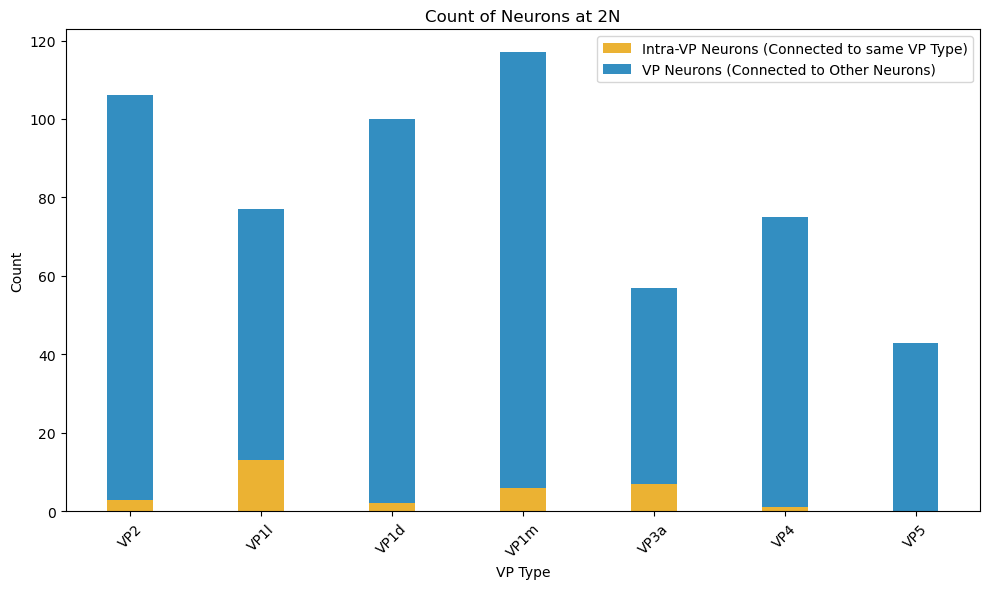

In [5]:
# Loop through all VP types in neurons_2N and determine the amount of unique root_id
unique_2N_root_id_counts = {}
all_2N_unique_root_id = set()
for vp_type, class_df in neurons_2N.items():
    unique_2N_root_id_counts[vp_type] = class_df['root_id'].nunique()
    all_2N_unique_root_id.update(class_df['root_id'])

# Print the counts
for vp_type, count in unique_2N_root_id_counts.items():
    print(f"Unique root_id count for {vp_type}: {count}")
print(f"Unique root_id count for all VPs: {len(all_2N_unique_root_id)}")
print("\n")

# Loop through all VP types in neurons_2N and count neurons where intraVP is True
intra_vp_neuron_counts = {}
total_intra_vp_neurons = 0
for vp_type, class_df in neurons_2N.items():
    intra_vp_neuron_count = class_df[class_df['intraVP'] == True].shape[0]
    intra_vp_neuron_counts[vp_type] = intra_vp_neuron_count
    total_intra_vp_neurons += intra_vp_neuron_count

# Print the counts
for vp_type, count in intra_vp_neuron_counts.items():
    print(f"Count of neurons with intraVP=True for {vp_type}: {count}")
print(f"Count of neurons with intraVP=True for all VPs: {total_intra_vp_neurons}")

# Combine bar plots for intra_vp_neuron_counts and unique_root_id_counts by VP type with overlap, subtracting intra VP from unique root IDs
plt.figure(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

# Set positions of bars on x-axis
index = np.arange(len(intra_vp_neuron_counts.keys()))

# Create bars for intra_vp_neuron_counts
plt.bar(index, intra_vp_neuron_counts.values(), bar_width, alpha=opacity, label='Intra-VP Neurons', color='#E69F00')

# Adjust unique_root_id_counts by subtracting intra_vp_neuron_counts
adjusted_unique_root_id_counts = {vp_type: unique_2N_root_id_counts[vp_type] - intra_vp_neuron_counts[vp_type] for vp_type in unique_2N_root_id_counts.keys()}

# Create bars for adjusted unique_root_id_counts with overlap
plt.bar(index, adjusted_unique_root_id_counts.values(), bar_width, alpha=opacity, label='Adjusted Unique Root IDs', bottom=intra_vp_neuron_counts.values(), color='#0072B2')

plt.xlabel('VP Type')
plt.ylabel('Count')
plt.title('Count of Neurons at 2N')
plt.xticks(index, intra_vp_neuron_counts.keys(), rotation=45)
plt.legend(['Intra-VP Neurons (Connected to same VP Type)', 'VP Neurons (Connected to Other Neurons)'])
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig1_vp_neuron_counts.pdf', bbox_inches='tight', dpi=300)
plt.show()

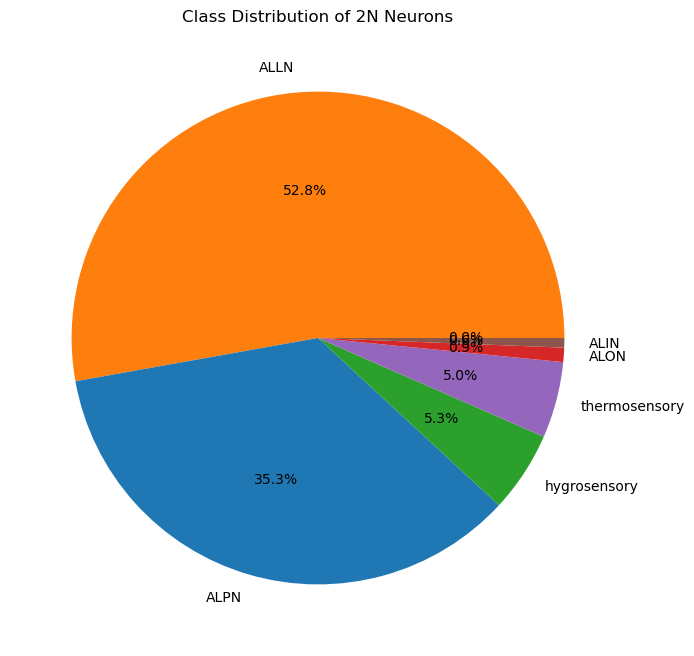

In [6]:
# Define a consistent color palette for all VP plots
class_colors = {
    'ALLN': '#ff7f0e',
    'ALPN': '#1f77b4', 
    'hygrosensory': '#2ca02c',
    'thermosensory': '#9467bd',
    'ALON': '#d62728',
    'ALIN': '#8c564b',
}

# Merge all_2N_unique_root_id with classification dataframe
all_2N_df = pd.DataFrame(list(all_2N_unique_root_id), columns=['root_id']).merge(classification, on='root_id', how='inner')

plt.figure(figsize=(10, 8))
class_counts = all_2N_df['class'].value_counts(normalize=True)
other_counts = class_counts[class_counts < 0.0045].sum()
class_counts = class_counts[class_counts >= 0.0045]
class_counts['other'] = other_counts

# Get colors for each class, using class_colors if available
colors = [class_colors[c] if c in class_colors else '#7f7f7f' for c in class_counts.index]

class_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ylabel='')
plt.title('Class Distribution of 2N Neurons')
# Save the current figure to PDF
plt.savefig('./figures/Fig2_2N_neuron_classes.pdf', bbox_inches='tight', dpi=300)
plt.show()

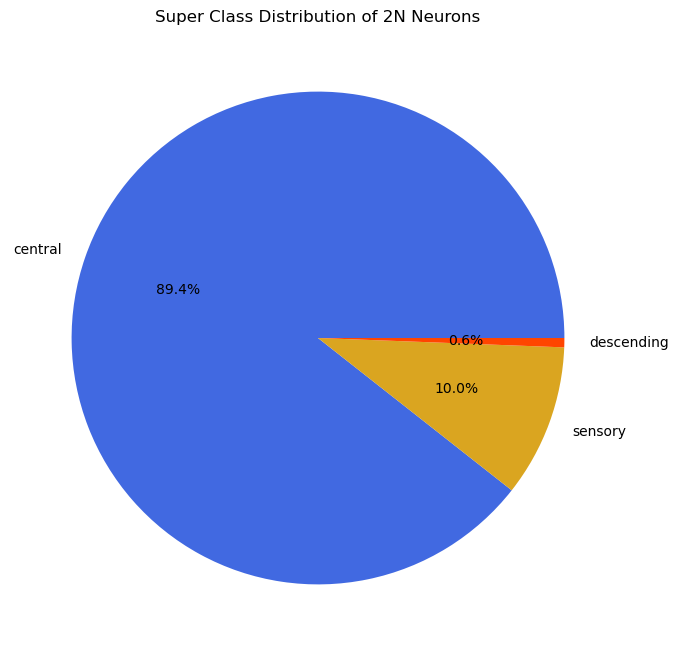

In [7]:
# Define a consistent color palette for all superclass plots
super_class_colors = {
    'sensory': '#DAA520',
    'central': '#4169E1',
    'ascending': '#32CD32', 
    'descending': '#FF4500',
    'visual_projection': '#CBAACB',
    'visual_centrifugal': '#FFB347',
}

plt.figure(figsize=(10, 8))
superclass_counts = all_2N_df['super_class'].value_counts(normalize=True)

# Get colors for each class, using class_colors if available
colors = [super_class_colors[c] if c in super_class_colors else '#7f7f7f' for c in superclass_counts.index]

superclass_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ylabel='')
plt.title('Super Class Distribution of 2N Neurons')
# Save the current figure to PDF
plt.savefig('./figures/Fig3_2N_neuron_superclasses.pdf', bbox_inches='tight', dpi=300)
plt.show()

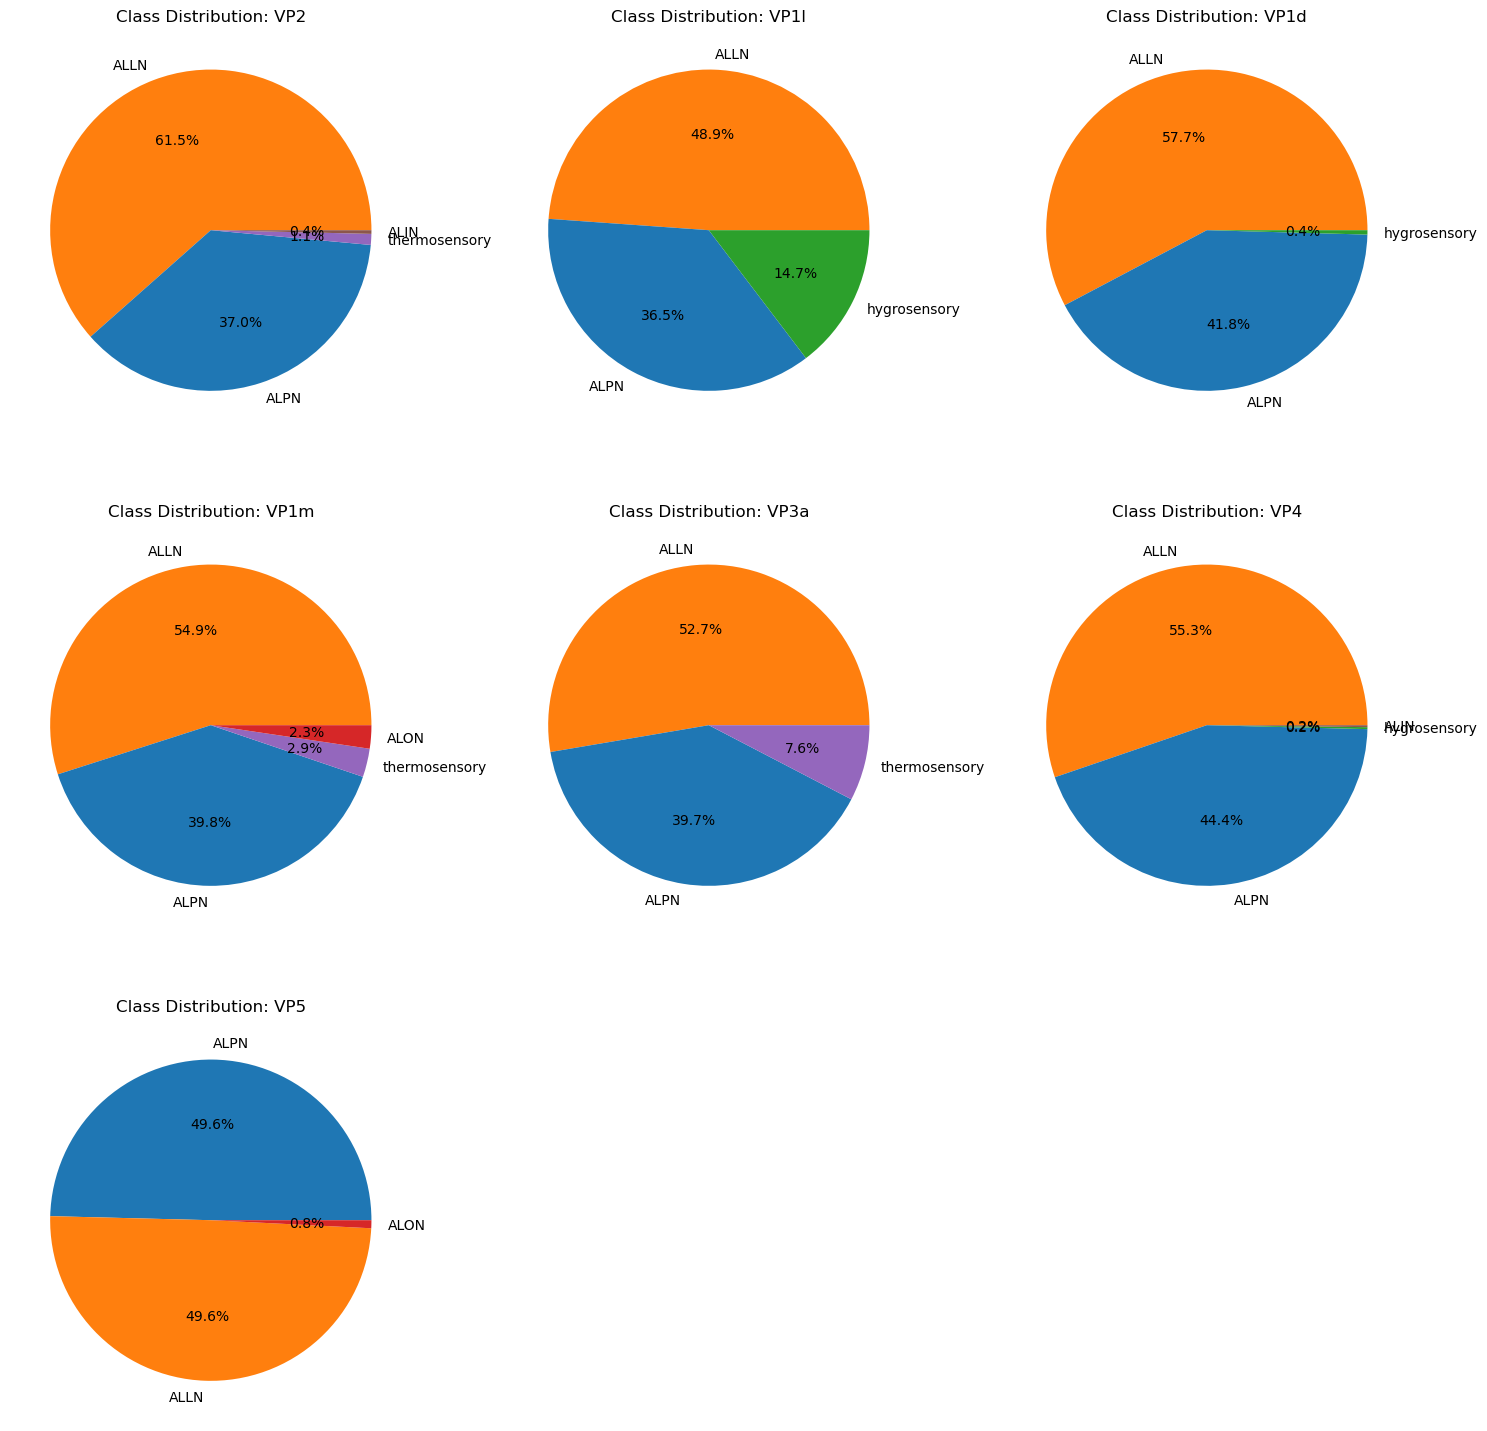

In [8]:
# Create a figure with subplots for each VP type's class distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_2N.items()):
    # Merge with classification data to get classes
    vp_class_df = vp_df.merge(classification, left_on='post_root_id', right_on='root_id', how='inner')
    
    # Calculate class distribution
    class_counts = vp_class_df['class'].value_counts(normalize=True)
    
    # Create pie chart with consistent colors
    colors = [class_colors[c] if c in class_colors else class_colors['other'] for c in class_counts.index]
    class_counts.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=colors,ylabel='')
    axs[i].set_title(f'Class Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig4_2N_vp_class_distributions.pdf', bbox_inches='tight', dpi=300)
plt.show()


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

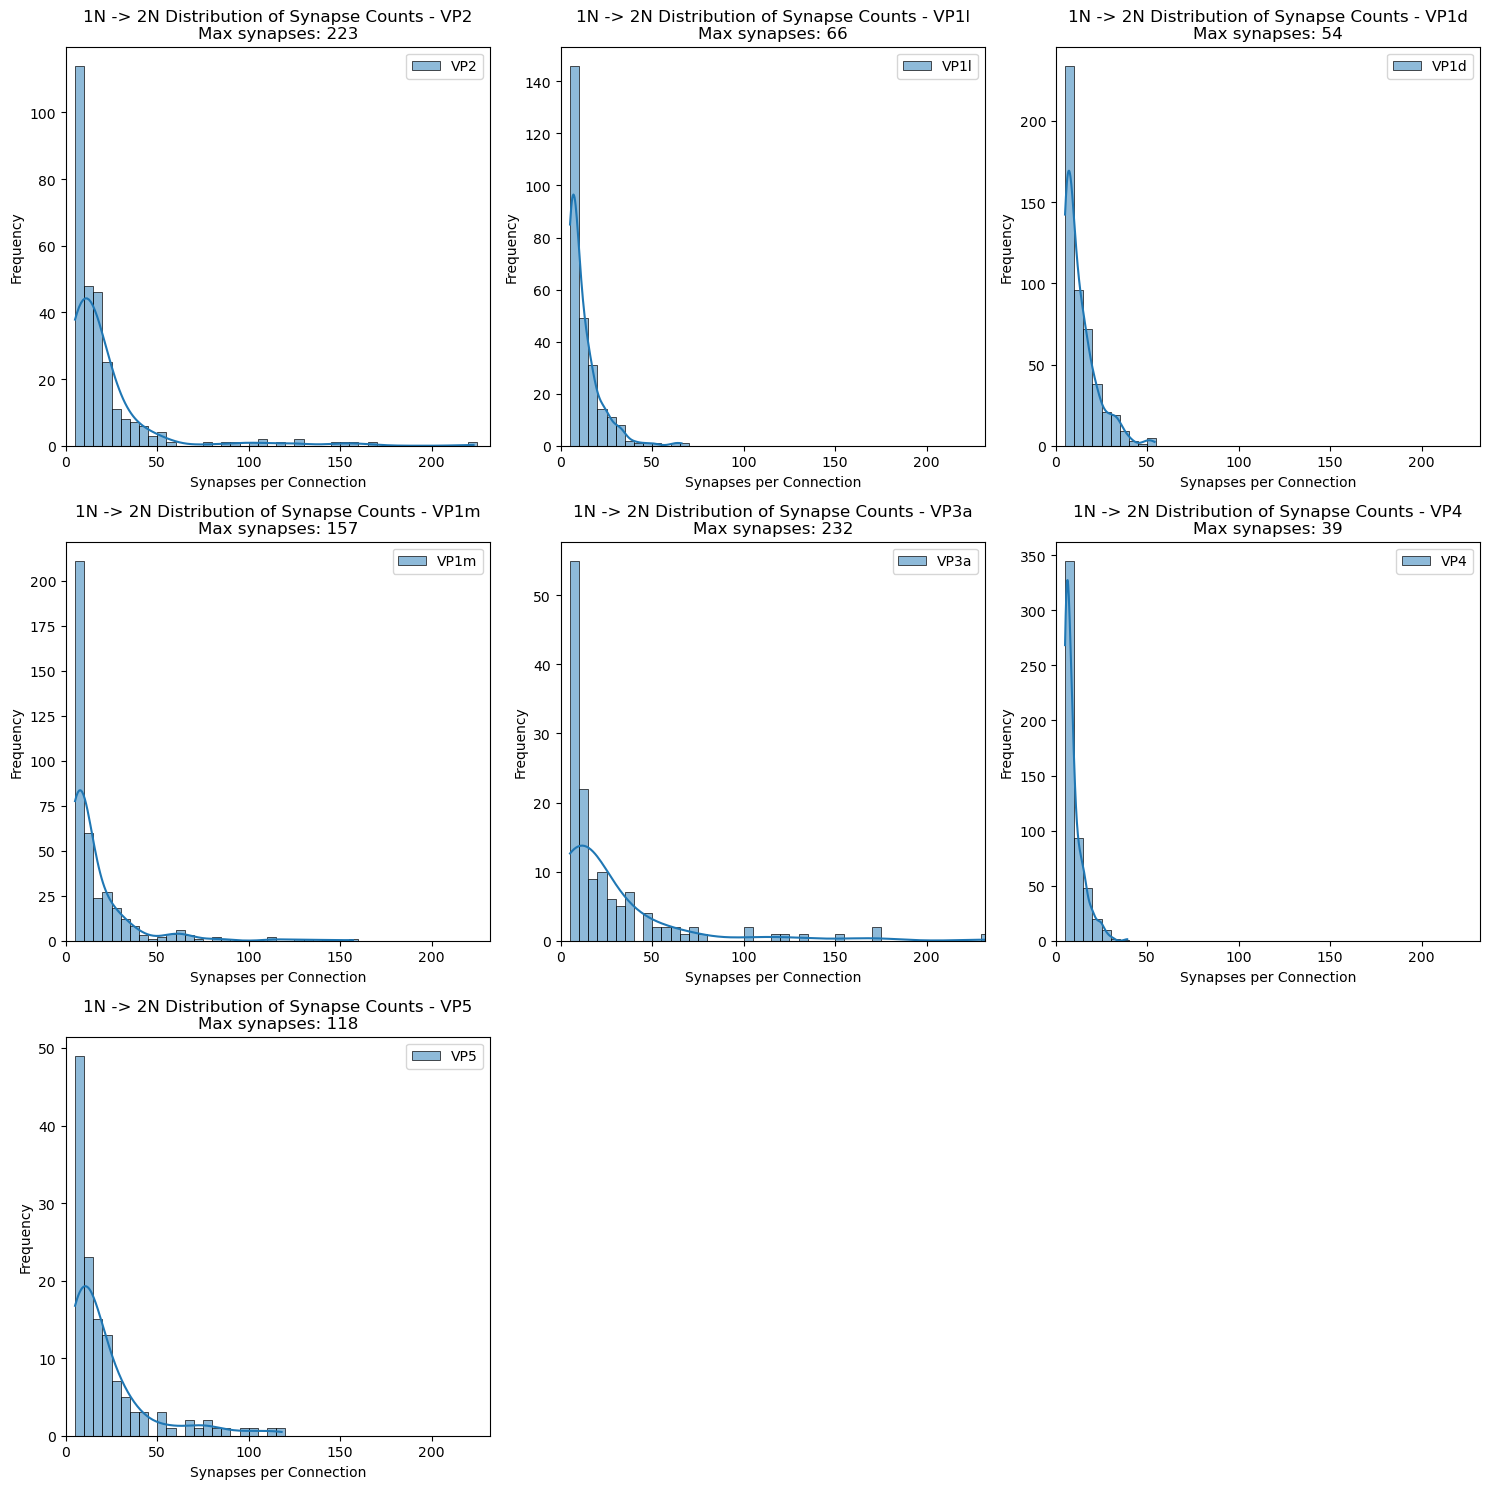

Largest 5 syn_counts and post_root_id in connections_2N:
VP Type: VP2, syn_count: 223, post_root_id: 720575940619895125
VP Type: VP1l, syn_count: 66, post_root_id: 720575940628338028
VP Type: VP1d, syn_count: 54, post_root_id: 720575940612284569
VP Type: VP1m, syn_count: 157, post_root_id: 720575940619411147
VP Type: VP3a, syn_count: 232, post_root_id: 720575940633074145
VP Type: VP4, syn_count: 39, post_root_id: 720575940626043218
VP Type: VP5, syn_count: 118, post_root_id: 720575940604414636

Classification data for most highly connected 2N neuron:
Maximum synapse count: pre_root_id     720575940616999069
post_root_id    720575940633074145
neuropil                      AL_L
syn_count                      232
nt_type                        ACH
Name: 50234, dtype: object (from VP3a)


In [9]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# First find the global max x value to set consistent x axis limits
max_syn_count = max(df['syn_count'].max() for df in connections_2N.values())
max_entry = max(((df.loc[df['syn_count'].idxmax()], vp_type) for vp_type, df in connections_2N.items()), key=lambda x: x[0]['syn_count'])

# Loop through connections_2N and graph the distribution of syn_count by VP modality
for i, (vp_type, class_df) in enumerate(connections_2N.items()):
    # Plot the distribution of syn_count by VP modality
    max_synapses = connections_2N[vp_type]['syn_count'].max()
    sns.histplot(class_df['syn_count'], bins=range(0, max_syn_count+5, 5), kde=len(class_df) > 20, label=vp_type, ax=axs[i])
    axs[i].set_title(f'1N -> 2N Distribution of Synapse Counts - {vp_type}\nMax synapses: {max_synapses}')
    axs[i].set_xlabel('Synapses per Connection')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(0, max_syn_count)  # Set same x axis limits for all plots
    axs[i].legend()

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig5_2N_syn_counts.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Explore highly connected neurons by Finding the largest 5 syn_counts in the connections_2N
largest_5_syn_counts = {vp_type: class_df.loc[class_df['syn_count'].idxmax()]['syn_count'] for vp_type, class_df in connections_2N.items()}

# Print the largest 5 syn_counts and post_root_id
print("Largest 5 syn_counts and post_root_id in connections_2N:")
for vp_type, class_df in connections_2N.items():
    largest_syn_count_row = class_df.loc[class_df['syn_count'].idxmax()]
    print(f"VP Type: {vp_type}, syn_count: {largest_syn_count_row['syn_count']}, post_root_id: {largest_syn_count_row['post_root_id']}")

print("\nClassification data for most highly connected 2N neuron:")
print(f"Maximum synapse count: {max_entry[0]} (from {max_entry[1]})")

vp Type: VP2 | Top Neuron ID: 720575940631347011 | Synapses: 513
vp Type: VP1l | Top Neuron ID: 720575940628338028 | Synapses: 439
vp Type: VP1d | Top Neuron ID: 720575940612284569 | Synapses: 456
vp Type: VP1m | Top Neuron ID: 720575940619411147 | Synapses: 783
vp Type: VP3a | Top Neuron ID: 720575940633074145 | Synapses: 507
vp Type: VP4 | Top Neuron ID: 720575940626043218 | Synapses: 440
vp Type: VP5 | Top Neuron ID: 720575940626991147 | Synapses: 308


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

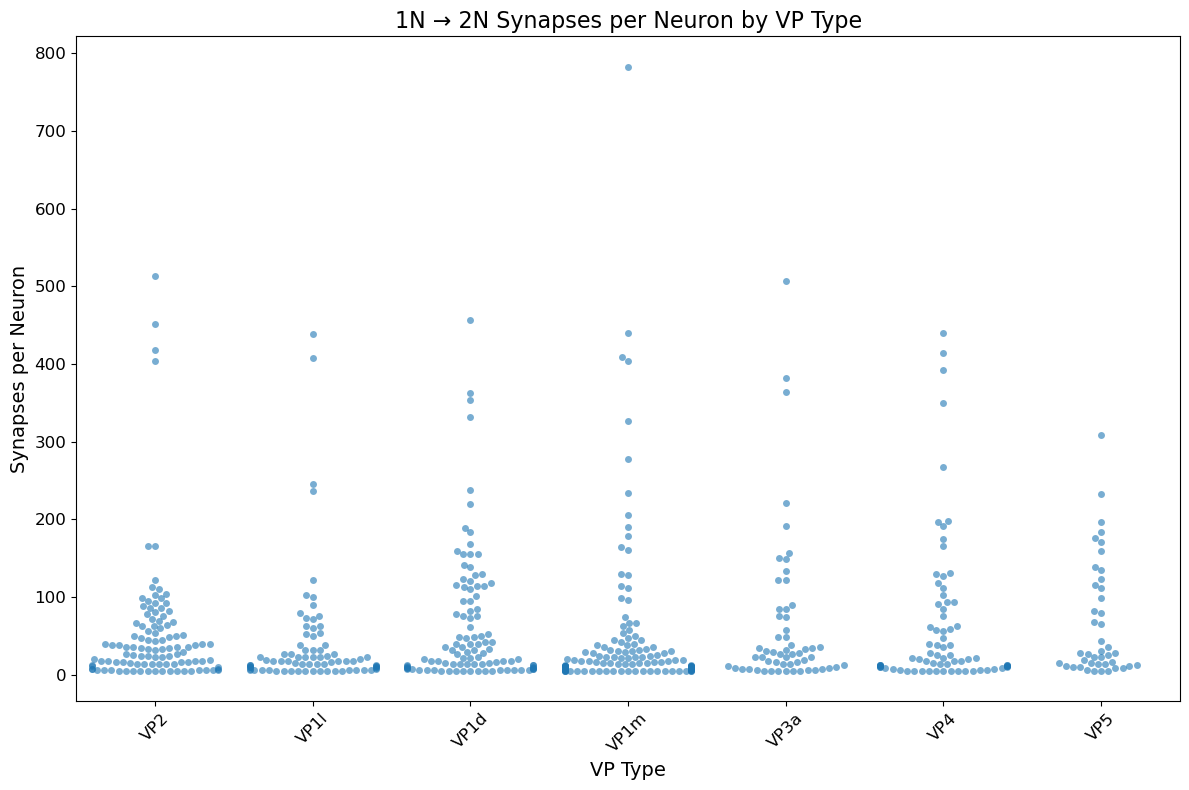

In [10]:
# Collect ORN per-neuron syn counts into DataFrame
swarmplot_data = []

for vp_type, class_df in connections_2N.items():
    # Group by root ID
    syn_per_neuron = class_df.groupby('post_root_id')['syn_count'].sum()

    # Store for plotting
    for neuron_id, syn_count in syn_per_neuron.items():
        swarmplot_data.append({
            'VP Type': vp_type,
            'Neuron ID': neuron_id,
            'Synapses per Neuron': syn_count
        })

    # Find and print top neuron
    top_neuron_id = syn_per_neuron.idxmax()
    top_syn_count = syn_per_neuron.max()
    
    print(f"vp Type: {vp_type} | Top Neuron ID: {top_neuron_id} | Synapses: {top_syn_count}")

# Convert to DataFrame
swarmplot_df = pd.DataFrame(swarmplot_data)

# Plot
plt.figure(figsize=(12, 8))

# Swarmplot
sns.swarmplot(
    data=swarmplot_df, 
    x='VP Type', 
    y='Synapses per Neuron',  
    alpha=0.6, 
)

plt.title('1N → 2N Synapses per Neuron by VP Type', fontsize=16)
plt.ylabel('Synapses per Neuron', fontsize=14)
plt.xlabel('VP Type', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('./figures/Fig6_2N_syn_counts_per_neuron_swarmplot.pdf', bbox_inches='tight', dpi=300)
plt.show()

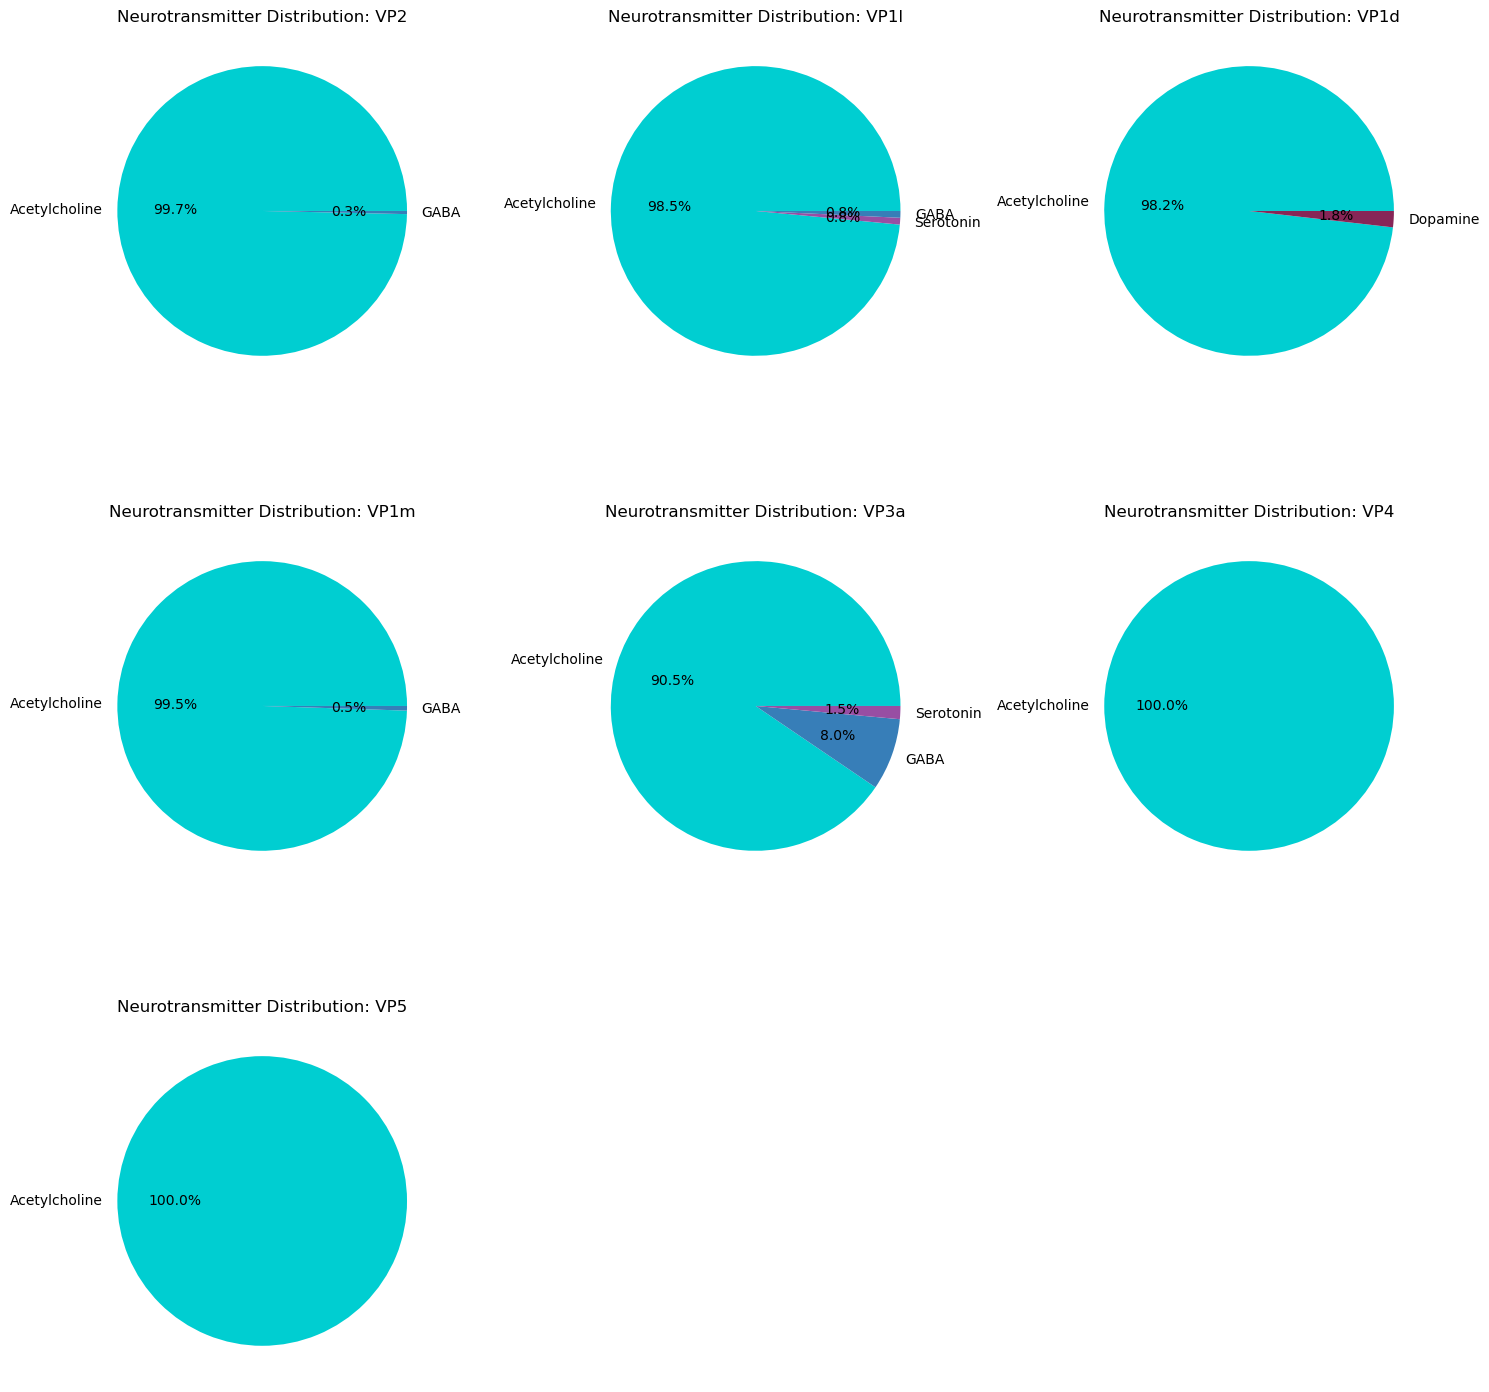

In [11]:
# Pie charts for nt_type
# Create a figure with subplots for each VP type's neurotransmitter distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Define color palette for neurotransmitters
nt_colors = {
    'ACH': '#00CED1',
    'SER': '#984EA3',
    'DA': '#872657',
    'GABA': '#377EB8',
    'GLUT': '#FF6347',
    'OCT': '#FFBF00'
}

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_2N.items()):
    # Count the neurotransmitter types
    nt_counts = vp_df['nt_type'].value_counts()
    
    # Replace ACH with Acetylcholine, SER with Serine, and DA with Dopamine in the labels
    labels = [label.replace('ACH', 'Acetylcholine').replace('SER', 'Serotonin').replace('DA', 'Dopamine') for label in nt_counts.index]
    
    # Get colors for each neurotransmitter
    colors = [nt_colors[nt] for nt in nt_counts.index]
    
    # Create pie chart
    axs[i].pie(nt_counts.values, labels=labels, colors=colors, autopct='%1.1f%%')
    axs[i].set_title(f'Neurotransmitter Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig6_2N_neurotransmitter_dist.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [12]:
# Create dictionary to store filtered connection dataframes for each VP type
connections_3N = {}
neurons_3N = {}

# For each 2N, filter connections where pre_root_id matches 2N root_id with synapse filter of 10
for vp_type, vp_df in neurons_2N.items():
    downstream = connections[(connections['pre_root_id'].isin(vp_df[vp_df['intraVP'] == False]['root_id'])) & (connections['syn_count'] >= 10)]
    # Create a copy of the filtered classification data
    downstream_classification = classification[classification['root_id'].isin(downstream['post_root_id'])].copy()
    # Use .loc to properly set values in the dataframe
    downstream_classification.loc[:,'intraVP_2N'] = downstream_classification['root_id'].isin(vp_df['root_id'])
    downstream_classification['interVP_2N'] = (downstream_classification['root_id'].isin(all_2N_unique_root_id) == True) & (downstream_classification['intraVP_2N'] == False)

    
    connections_3N[vp_type] = downstream
    neurons_3N[vp_type] = downstream_classification


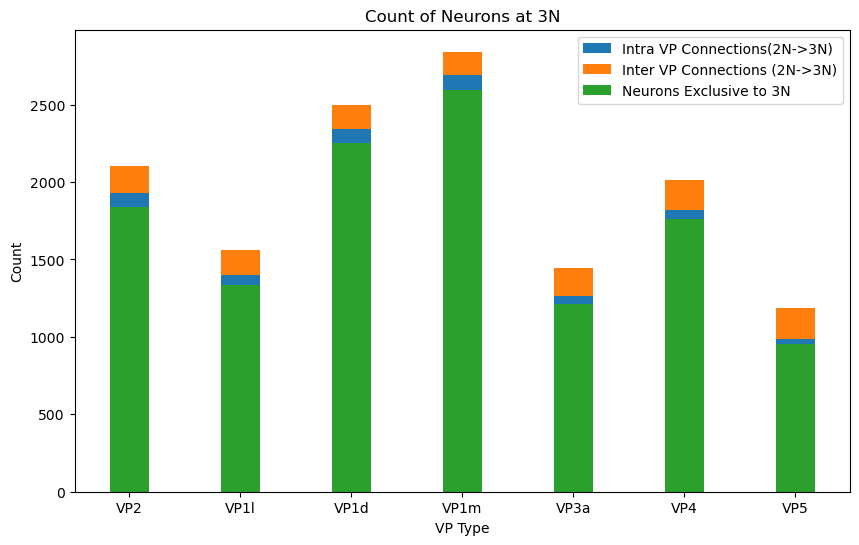

Total unique neuron root_id across all VP in neurons_3N: 4030


In [13]:
# Get the counts of all neurons, intraVP_2N and interVP_2N
all_neurons_count = [len(neurons_3N[vp_type]) for vp_type in neurons_3N]
intraVP_2N_count = [len(neurons_3N[vp_type][neurons_3N[vp_type]['intraVP_2N'] == True]) for vp_type in neurons_3N]
interVP_2N_count = [len(neurons_3N[vp_type][neurons_3N[vp_type]['interVP_2N'] == True]) for vp_type in neurons_3N]

# Calculate other neurons (not intra or inter VP)
other_neurons_count = [all_neurons_count[i] - intraVP_2N_count[i] - interVP_2N_count[i] for i in range(len(all_neurons_count))]

# Create the stacked bar plot
x = np.arange(len(neurons_3N))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, intraVP_2N_count, width, bottom=other_neurons_count, label='Intra VP Connections(2N->3N)')
plt.bar(x, interVP_2N_count, width, bottom=[other_neurons_count[i] + intraVP_2N_count[i] for i in range(len(other_neurons_count))], label='Inter VP Connections (2N->3N)')
plt.bar(x, other_neurons_count, width, label='Neurons Exclusive to 3N')


# Adding labels
plt.xlabel('VP Type')
plt.ylabel('Count')
plt.title('Count of Neurons at 3N')
plt.xticks(x, neurons_3N.keys())
plt.legend()

# Save the current figure to PDF
plt.savefig('./figures/Fig7_3N_neuron_counts.pdf', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

# Calculate the total unique neuron root_id across all VP in neurons_3N
all_3N_unique_root_id = set()
for vp_type in neurons_3N:
    all_3N_unique_root_id.update(neurons_3N[vp_type]['root_id'])

print(f"Total unique neuron root_id across all VP in neurons_3N: {len(all_3N_unique_root_id)}")
# Convert the set of unique root IDs to a DataFrame
all_3N_unique_root_id_df = pd.DataFrame(list(all_3N_unique_root_id), columns=['root_id'])

# Save to CSV
all_3N_unique_root_id_df.to_csv('3N_ids.csv', index=False)



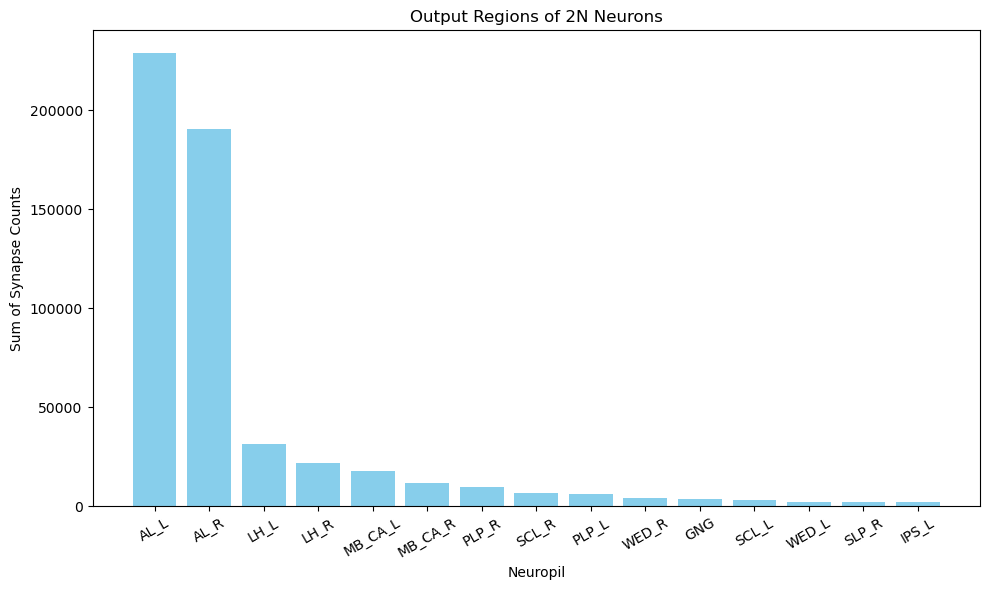

In [14]:
neuropils = pd.read_csv('neuropil_synapse_table_783.csv.gz')
all_2N_unique_root_id_df = pd.DataFrame(list(all_2N_unique_root_id), columns=['root_id'])
neuropils_2N = pd.merge(all_2N_unique_root_id_df, neuropils, on='root_id', how='inner')

# Excluding specified columns and summing the neuropils_2N columns
neuropils_2N_sum = neuropils_2N.drop(columns=[col for col in neuropils_2N.columns if 'input' in col or 'partners' in col], axis=1).sum(axis=0)
neuropils_2N_sum = neuropils_2N_sum.drop(['root_id','output synapses'])
# Plotting the bar graph excluding columns with sum 0
filtered_neuropils_2N_sum = neuropils_2N_sum.nlargest(15)
filtered_neuropils_2N_sum.index = filtered_neuropils_2N_sum.index.str.split().str[-1]

plt.figure(figsize=(10, 6))
plt.bar(filtered_neuropils_2N_sum.index, filtered_neuropils_2N_sum.values, color='skyblue')
plt.xlabel('Neuropil')
plt.ylabel('Sum of Synapse Counts')
plt.title('Output Regions of 2N Neurons')
plt.xticks(rotation=30)
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig8_2N_neuropil_output.pdf', bbox_inches='tight', dpi=300)
plt.show()



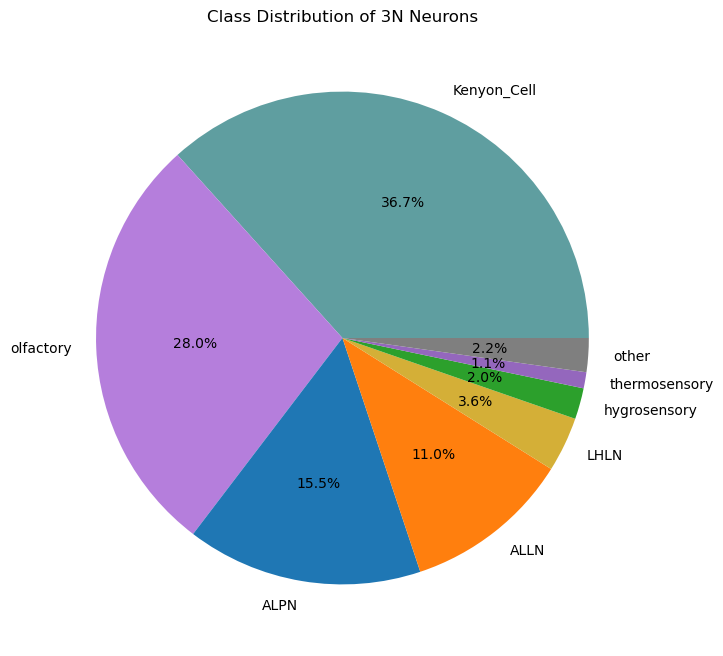

In [15]:
# Define a consistent color palette for all VP plots
N3_class_colors = {
    'Kenyon_Cell': '#5F9EA0',
    'olfactory': '#B57EDC',
    'LHLN': '#D4AF37',
    'hygrosensory': '#2ca02c',
    'thermosensory': '#9467bd',
    'ALPN': '#1f77b4',
    'ALLN': '#ff7f0e',
    'ALON': '#d62728',
    'ALIN': '#8c564b',
    'other': '#7f7f7f'
}

# Merge all_3N_unique_root_id with classification dataframe
all_3N_df = pd.DataFrame(list(all_3N_unique_root_id), columns=['root_id']).merge(classification, on='root_id', how='inner')

plt.figure(figsize=(10, 8))
class_counts = all_3N_df['class'].value_counts(normalize=True)
other_counts = class_counts[class_counts < 0.0055].sum()
class_counts = class_counts[class_counts >= 0.0055]
class_counts['other'] = other_counts

# Get colors for each class, using 'gray' for 'other'
colors = [N3_class_colors.get(cls, 'gray') for cls in class_counts.index]

class_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ylabel='')
plt.title('Class Distribution of 3N Neurons')
# Save the current figure to PDF
plt.savefig('./figures/Fig9_3N_neuron_classes.pdf', bbox_inches='tight', dpi=300)
plt.show()

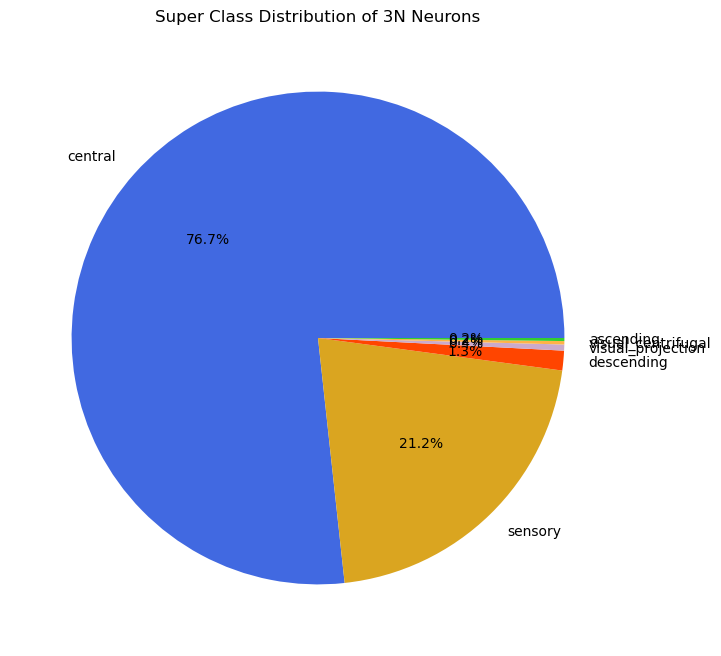

In [16]:
plt.figure(figsize=(10, 8))
superclass_counts = all_3N_df['super_class'].value_counts(normalize=True)
# Get colors for each class, using class_colors if available
colors = [super_class_colors[c] if c in super_class_colors else '#7f7f7f' for c in superclass_counts.index]

superclass_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ylabel='')
plt.title('Super Class Distribution of 3N Neurons')
# Save the current figure to PDF
plt.savefig('./figures/Fig10_3N_neuron_superclasses.pdf', bbox_inches='tight', dpi=300)
plt.show()

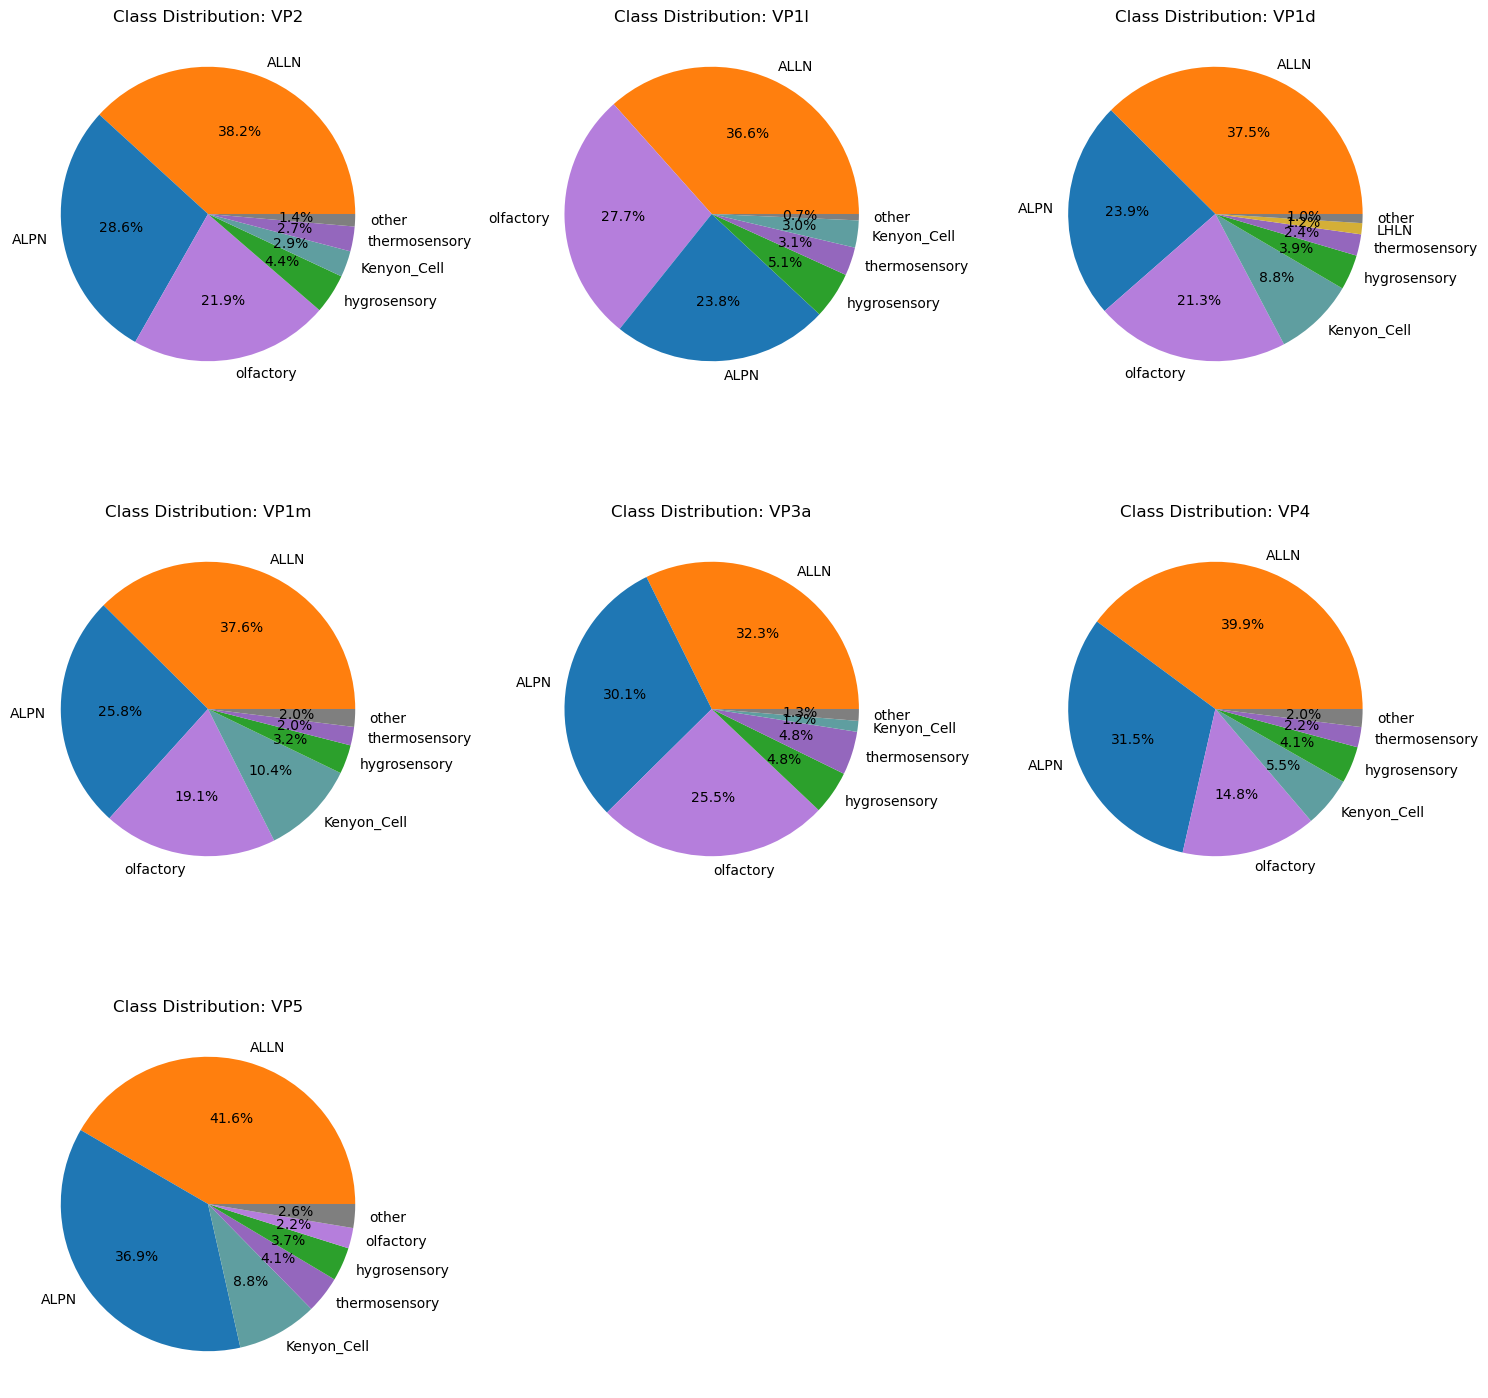

In [17]:
# Create a figure with subplots for each VP type's class distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_3N.items()):
    # Merge with classification data to get classes
    vp_class_df = vp_df.merge(classification, left_on='post_root_id', right_on='root_id', how='inner')
    
    # Calculate class distribution
    class_counts = vp_class_df['class'].value_counts(normalize=True)
    
    # Combine classes with less than 1% into 'other'
    other_mask = class_counts < 0.01
    other_sum = class_counts[other_mask].sum()
    class_counts = class_counts[~other_mask]
    if other_sum > 0:
        class_counts['other'] = other_sum
    
    # Create pie chart with consistent colors
    colors = [N3_class_colors[c] if c in N3_class_colors else N3_class_colors['other'] for c in class_counts.index]
    class_counts.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=colors, ylabel='')
    axs[i].set_title(f'Class Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig11_3N_vp_class_distributions.pdf', bbox_inches='tight', dpi=300)
plt.show()

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

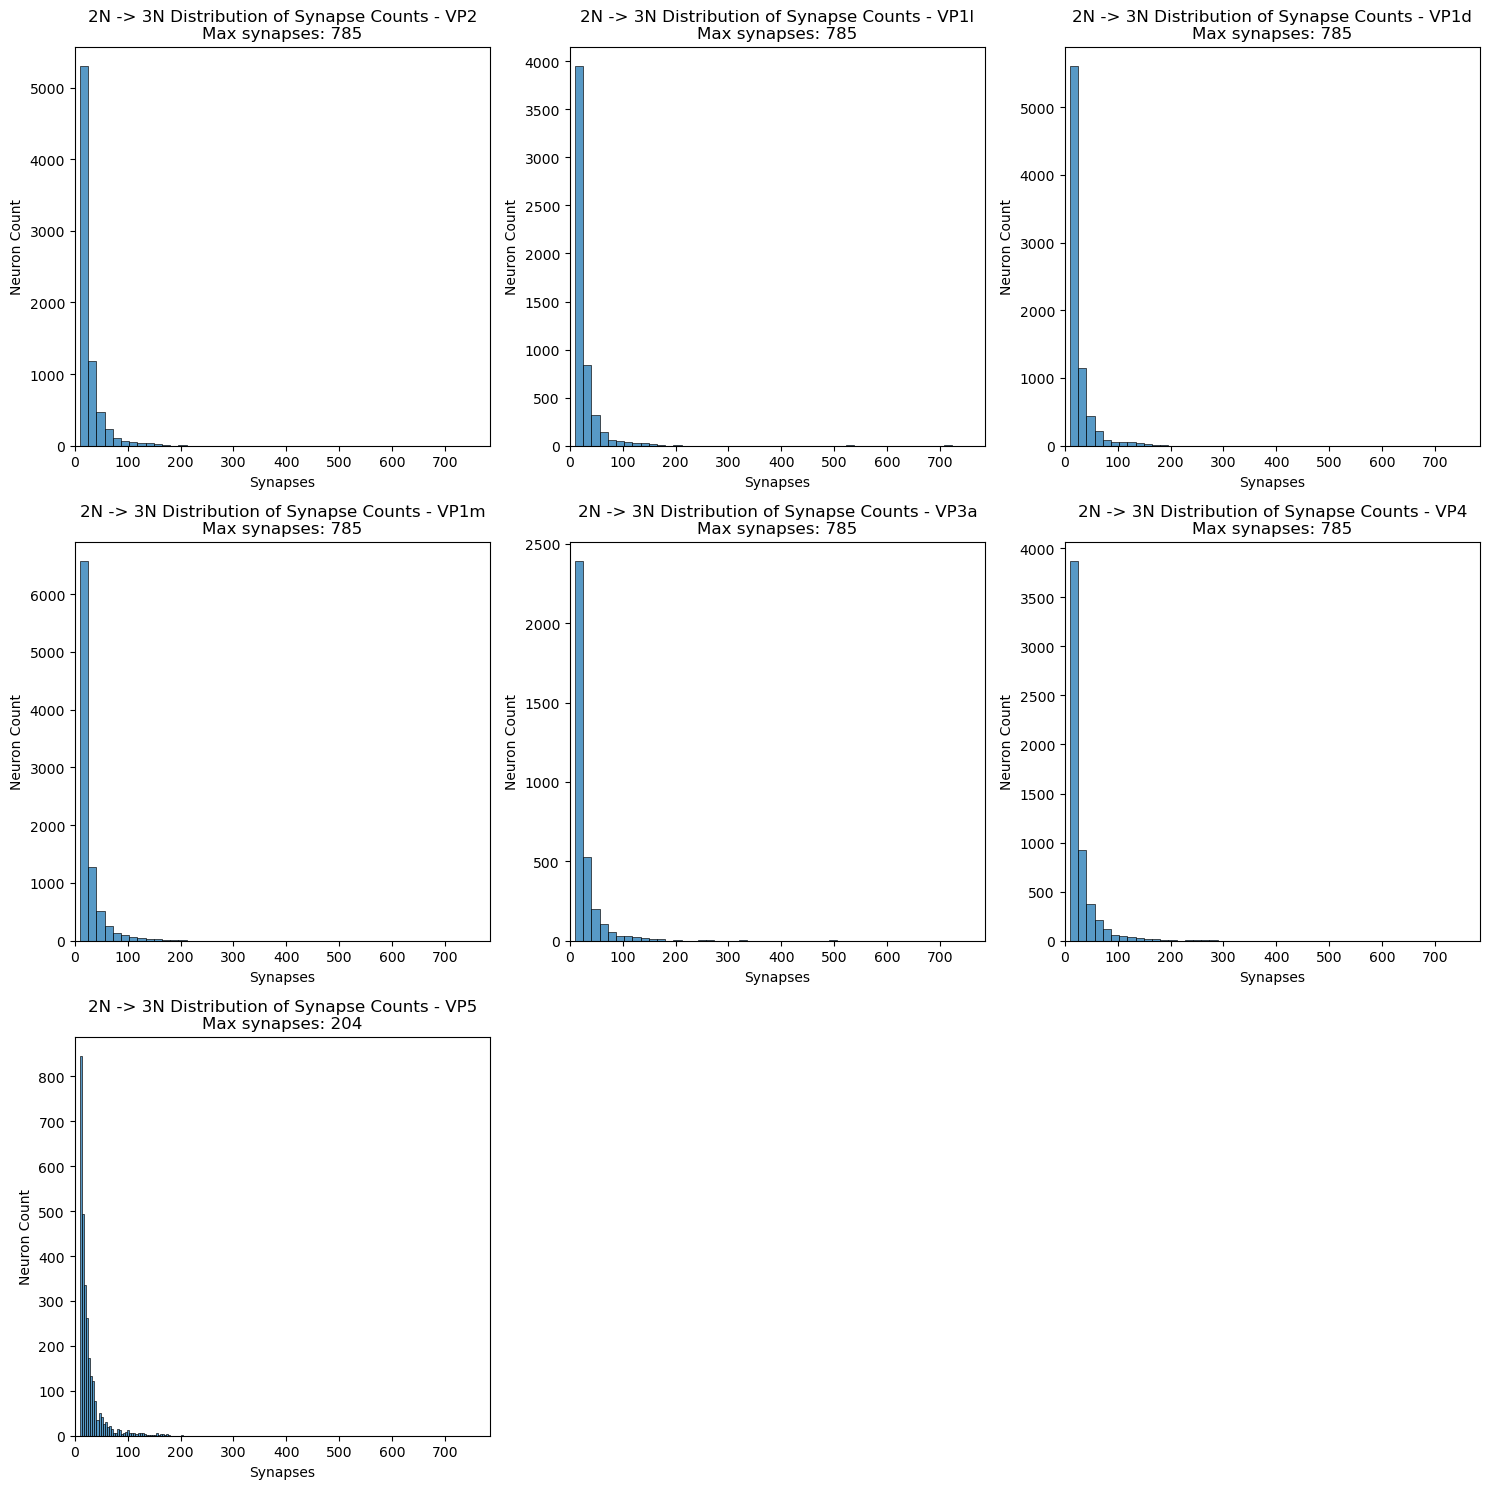

Largest 5 syn_counts and post_root_id in connections_2N:
VP Type: VP2, syn_count: 785, post_root_id: 720575940638128474
VP Type: VP1l, syn_count: 785, post_root_id: 720575940638128474
VP Type: VP1d, syn_count: 785, post_root_id: 720575940638128474
VP Type: VP1m, syn_count: 785, post_root_id: 720575940638128474
VP Type: VP3a, syn_count: 785, post_root_id: 720575940638128474
VP Type: VP4, syn_count: 785, post_root_id: 720575940638128474
VP Type: VP5, syn_count: 204, post_root_id: 720575940619895125

VP2 connection with 785 synapses:
              pre_root_id        post_root_id neuropil  syn_count nt_type
16159  720575940632795532  720575940638128474     AL_L        785    GABA


In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Find global max synapse count across all VP types
global_max = max(connections_3N[vp_type]['syn_count'].max() for vp_type in connections_3N)

for i, vp_type in enumerate(connections_3N):
    if i < len(axes):
        max_synapses = connections_3N[vp_type]['syn_count'].max()
        sns.histplot(data=connections_3N[vp_type], x='syn_count', bins=50, ax=axes[i])
        axes[i].set_title(f'2N -> 3N Distribution of Synapse Counts - {vp_type}\nMax synapses: {max_synapses}')
        axes[i].set_xlabel('Synapses') 
        axes[i].set_ylabel('Neuron Count')
        # Set same x-axis limits for all subplots
        axes[i].set_xlim(0, global_max)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig12_3N_syn_counts.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Print the largest 5 syn_counts and post_root_id
print("Largest 5 syn_counts and post_root_id in connections_2N:")
for vp_type, class_df in connections_3N.items():
    largest_syn_count_row = class_df.loc[class_df['syn_count'].idxmax()]
    print(f"VP Type: {vp_type}, syn_count: {largest_syn_count_row['syn_count']}, post_root_id: {largest_syn_count_row['post_root_id']}")

# Get the entry with syn_count=785 from VP2 connections
vp2_max_connection = connections_3N['VP2'][connections_3N['VP2']['syn_count'] == 785]
print("\nVP2 connection with 785 synapses:")
print(vp2_max_connection)

vp Type: VP2 | Top Neuron ID: 720575940623788040 | Synapses: 3585
vp Type: VP1l | Top Neuron ID: 720575940638128474 | Synapses: 3149
vp Type: VP1d | Top Neuron ID: 720575940638128474 | Synapses: 3180
vp Type: VP1m | Top Neuron ID: 720575940638128474 | Synapses: 3547
vp Type: VP3a | Top Neuron ID: 720575940638128474 | Synapses: 1348
vp Type: VP4 | Top Neuron ID: 720575940623000858 | Synapses: 2148
vp Type: VP5 | Top Neuron ID: 720575940619895125 | Synapses: 786


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

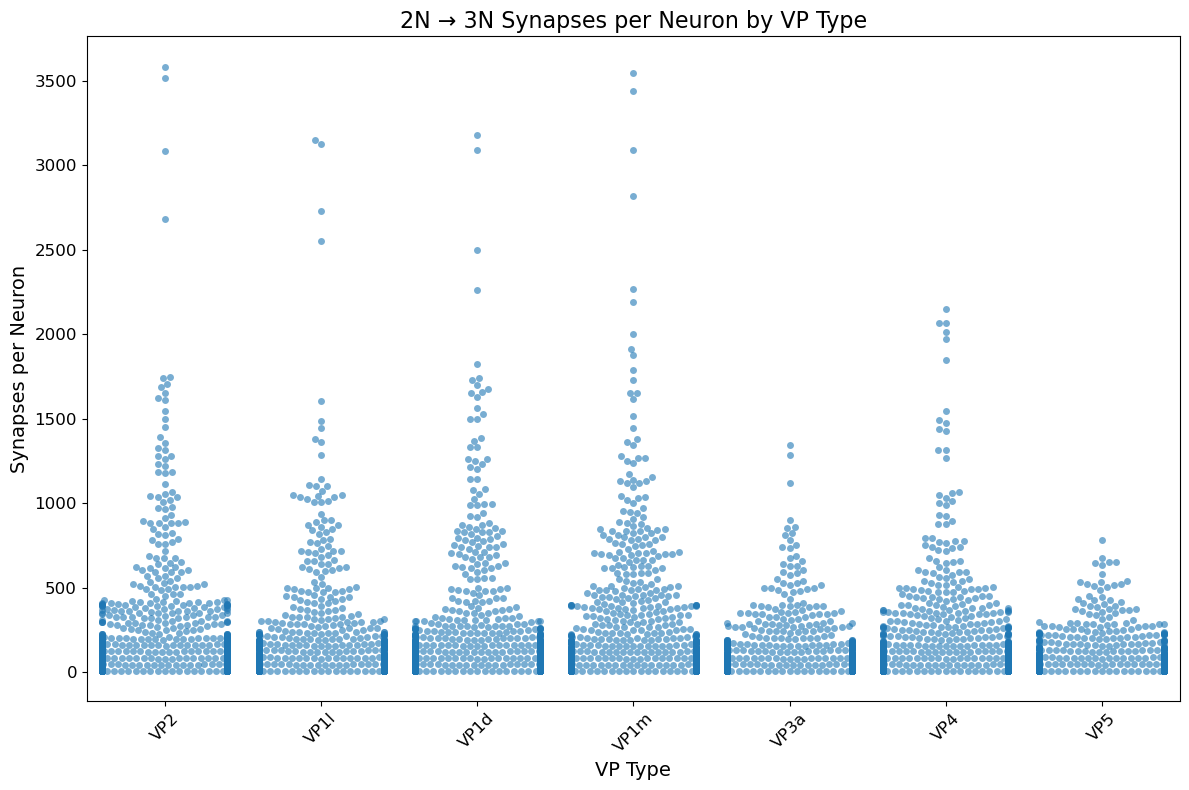

In [19]:
# Collect ORN per-neuron syn counts into DataFrame
swarmplot_data = []

for vp_type, class_df in connections_3N.items():
    # Group by root ID
    syn_per_neuron = class_df.groupby('post_root_id')['syn_count'].sum()

    # Store for plotting
    for neuron_id, syn_count in syn_per_neuron.items():
        swarmplot_data.append({
            'VP Type': vp_type,
            'Neuron ID': neuron_id,
            'Synapses per Neuron': syn_count
        })

    # Find and print top neuron
    top_neuron_id = syn_per_neuron.idxmax()
    top_syn_count = syn_per_neuron.max()
    
    print(f"vp Type: {vp_type} | Top Neuron ID: {top_neuron_id} | Synapses: {top_syn_count}")

# Convert to DataFrame
swarmplot_df = pd.DataFrame(swarmplot_data)

# Plot
plt.figure(figsize=(12, 8))

# Swarmplot
sns.swarmplot(
    data=swarmplot_df, 
    x='VP Type', 
    y='Synapses per Neuron',  
    alpha=0.6, 
)

plt.title('2N → 3N Synapses per Neuron by VP Type', fontsize=16)
plt.ylabel('Synapses per Neuron', fontsize=14)
plt.xlabel('VP Type', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('./figures/Fig12b_3N_syn_counts_per_neuron_swarmplot.pdf', bbox_inches='tight', dpi=300)
plt.show()

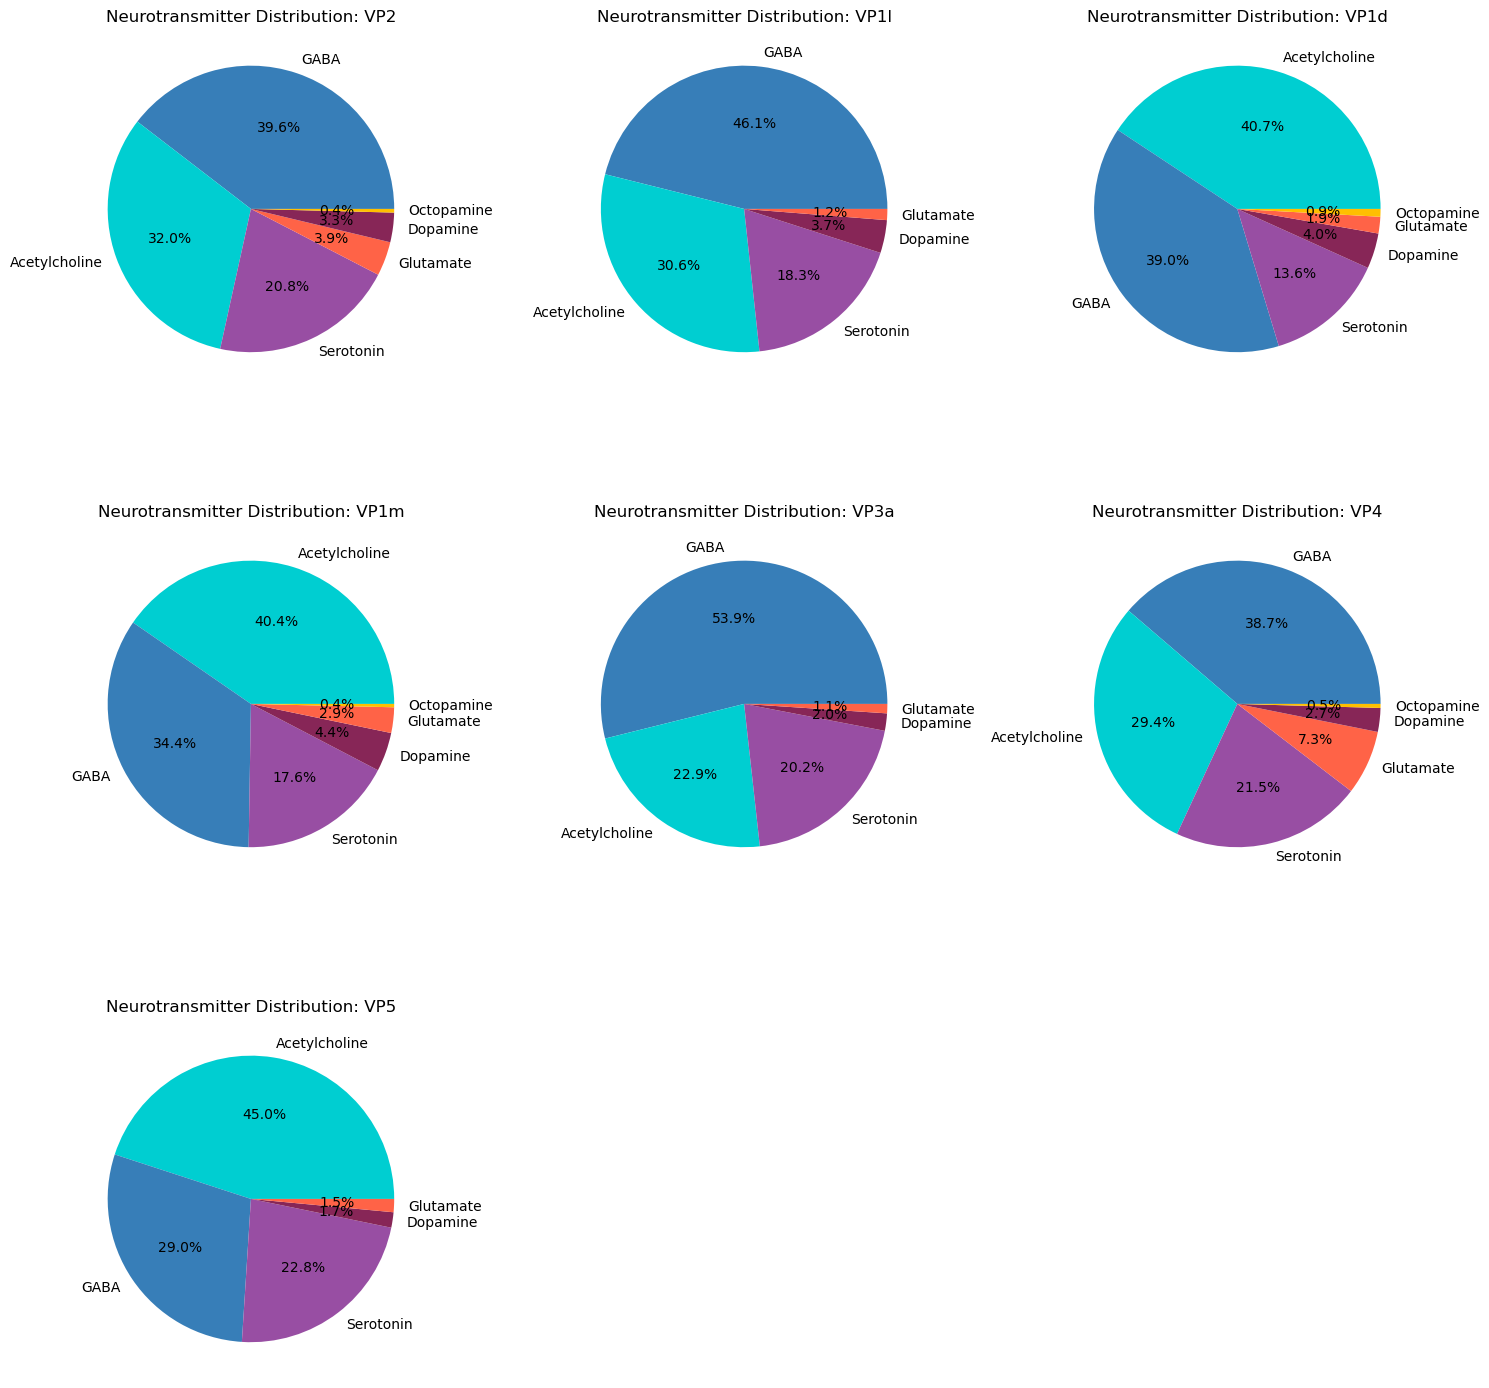

In [20]:
# Pie charts for nt_type
# Create a figure with subplots for each VP type's neurotransmitter distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_3N.items()):
    # Count the neurotransmitter types
    nt_counts = vp_df['nt_type'].value_counts()
    
    # Replace ACH with Acetylcholine, SER with Serine, DA with Dopamine, OCT with Octopamine, and GLUT with Glutamate in the labels
    labels = [label.replace('ACH', 'Acetylcholine').replace('SER', 'Serotonin').replace('DA', 'Dopamine').replace('OCT', 'Octopamine').replace('GLUT', 'Glutamate') for label in nt_counts.index]
    
    # Get colors for each neurotransmitter
    colors = [nt_colors[nt] for nt in nt_counts.index]
    
    # Create pie chart
    axs[i].pie(nt_counts.values, labels=labels, colors=colors, autopct='%1.1f%%')
    axs[i].set_title(f'Neurotransmitter Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig13_3N_neurotransmitter_dist.pdf', bbox_inches='tight', dpi=300)
plt.show()

## In silico neuron activation

In [21]:
rates = [5,10,15,20,25,50,75,100,125,150,175,200] # these are the different stimulation rates for the simulations

for vp_type, vp_df in vp_dfs.items():
    for i in rates:
        ids_activated = pd.read_csv(f'./results/cellTypes/CSVs/{vp_type.lower()}_{i}Hz_rates.csv')['flyid'].values
        neurons_2N[vp_type][f'activation_{i}Hz'] = neurons_2N[vp_type]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        neurons_3N[vp_type][f'activation_{i}Hz'] = neurons_3N[vp_type]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        connections_2N[vp_type][f'activation_{i}Hz'] = connections_2N[vp_type]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        connections_3N[vp_type][f'activation_{i}Hz'] = connections_3N[vp_type]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')

        # DEBUG
        #print(f'./results/cellTypes/CSVs/{vp_type.lower()}_{i}Hz_rates.csv')
        #activation_cols = [col for col in neurons_3N[vp_type].columns if 'activation' in col or 'root_id' in col]
        #print(activation_cols)
        #print(neurons_2N[vp_type][activation_cols])
        #print(neurons_3N[vp_type][activation_cols])
        #print(connections_3N[vp_type])
        #print(connections_2N[vp_type])

/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_38485/2882038135.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connections_2N[vp_type][f'activation_{i}Hz'] = connections_2N[vp_type]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_38485/2882038135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connections_3N[vp_type][f'activation_{i}Hz'] = connections_3N[vp_type]['post_root_id'].apply(lamb

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

                       VP2      VP1l  VP1d      VP1m      VP3a       VP4  \
activation_5Hz    0.933962  0.220779   1.0  0.965812  0.438596  0.066667   
activation_10Hz   0.933962  0.285714   1.0  0.982906  0.894737  0.973333   
activation_15Hz   0.943396  0.987013   1.0  0.982906  0.894737  0.973333   
activation_20Hz   0.933962  0.987013   1.0  0.991453  0.894737  0.986667   
activation_25Hz   0.933962  0.987013   1.0  0.982906  0.894737  0.986667   
activation_50Hz   0.971698  1.000000   1.0  0.991453  0.894737  0.986667   
activation_75Hz   0.971698  1.000000   1.0  1.000000  0.912281  0.986667   
activation_100Hz  0.981132  1.000000   1.0  1.000000  0.947368  1.000000   
activation_125Hz  0.990566  1.000000   1.0  1.000000  0.912281  1.000000   
activation_150Hz  0.981132  1.000000   1.0  1.000000  0.947368  1.000000   
activation_175Hz  0.990566  1.000000   1.0  1.000000  0.947368  1.000000   
activation_200Hz  0.990566  1.000000   1.0  1.000000  0.947368  1.000000   

           

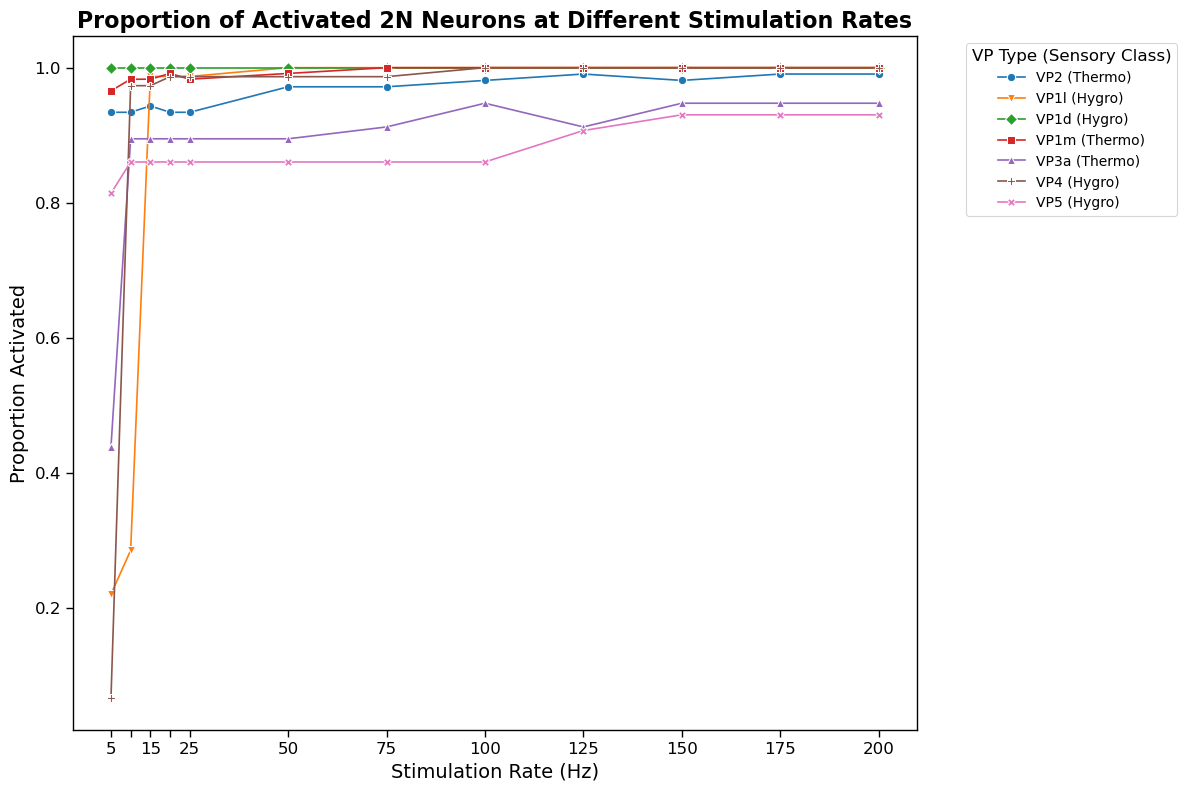

In [22]:
def get_activation_columns(df):
    return [col for col in df.columns if 'activation' in col]

# Function to calculate the proportion of activated neurons for each frequency
def calculate_proportions(df, frequency):
    total_neurons = df.shape[0]
    activated_neurons = df[df[frequency] == 'activated'].shape[0]
    return activated_neurons / total_neurons

# Initialize a dictionary to store proportions for each VP
proportions = {}

# Process each VP DataFrame
for vp in neurons_2N:
    activation_columns = get_activation_columns(neurons_2N[vp])
    proportions[vp] = {freq: calculate_proportions(neurons_2N[vp], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_df = pd.DataFrame(proportions)
print(proportions_df)

sns.set_context('paper')

# Define custom color palette for each VP and classify as thermosensory or hygrosensory
custom_palette = sns.color_palette("tab10", len(neurons_2N))
vp_colors = dict(zip(neurons_2N.keys(), custom_palette))
vp_classification = {vp: 'Thermo' if vp in ['VP2', 'VP3a', 'VP1m'] else 'Hygro' for vp in neurons_2N.keys()}
vp_markers = {
    'VP2': 'o',  # Thermo
    'VP3a': '^', # Thermo 
    'VP1m': 's', # Thermo
    'VP1d': 'D', # Hygro
    'VP1l': 'v', # Hygro
    'VP4': 'P',  # Hygro
    'VP5': 'X'   # Hygro
}

plt.figure(figsize=(12, 8))

for vp in proportions_df.columns:
    y = proportions_df[vp].values
    sns.lineplot(x=rates, y=y, color=vp_colors[vp], marker=vp_markers[vp], markersize=6, label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Activated 2N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks but exclude 10 and 20 labels
tick_labels = [str(rate) if rate not in [10, 20] else '' for rate in rates]
plt.xticks(rates, labels=tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig14_2N_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
# Initialize a dictionary to store proportions for each VP
proportions = {}

# Process each VP DataFrame
for vp in neurons_3N:
    activation_columns = get_activation_columns(neurons_3N[vp])
    proportions[vp] = {freq: calculate_proportions(neurons_3N[vp], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_df = pd.DataFrame(proportions)

print(proportions_df)

sns.set_context('paper')

# Define custom color palette for each VP and classify as thermosensory or hygrosensory
custom_palette = sns.color_palette("tab10", len(neurons_3N))
vp_colors = dict(zip(neurons_3N.keys(), custom_palette))

plt.figure(figsize=(12, 8))

for vp in proportions_df.columns:
    y = proportions_df[vp].values
    sns.lineplot(x=x, y=y, color=vp_colors[vp], marker=vp_markers[vp], markersize=6, label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Activated 3N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks but exclude 10 and 20 labels
tick_labels = [str(rate) if rate not in [10, 20] else '' for rate in rates]
plt.xticks(rates, labels=tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig15_3N_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()

                       VP2      VP1l      VP1d      VP1m      VP3a       VP4  \
activation_5Hz    0.594003  0.011538  0.666533  0.653291  0.018724  0.010934   
activation_10Hz   0.595431  0.020513  0.674950  0.656459  0.530513  0.668489   
activation_15Hz   0.596383  0.533333  0.674549  0.656107  0.542996  0.673956   
activation_20Hz   0.599714  0.535897  0.674549  0.657867  0.548544  0.675447   
activation_25Hz   0.597811  0.537821  0.673347  0.657867  0.549931  0.676441   
activation_50Hz   0.602094  0.540385  0.674950  0.658923  0.552705  0.675944   
activation_75Hz   0.603522  0.539744  0.675752  0.662443  0.555479  0.678926   
activation_100Hz  0.604474  0.539103  0.675351  0.663851  0.559639  0.678926   
activation_125Hz  0.605902  0.538462  0.673747  0.663147  0.561026  0.676938   
activation_150Hz  0.605902  0.539744  0.675351  0.665611  0.565187  0.679920   
activation_175Hz  0.605426  0.538462  0.675752  0.665259  0.567268  0.680915   
activation_200Hz  0.609710  0.539744  0.

ValueError: All arrays must be of the same length

<Figure size 1200x800 with 0 Axes>

          VP2      VP1l      VP1d      VP1m      VP3a       VP4       VP5
5    0.063438  0.000129  0.061305  0.062339  0.000194  0.000237  0.058289
10   0.063445  0.000230  0.063251  0.063050  0.058935  0.061635  0.060508
15   0.063438  0.061571  0.063653  0.063057  0.061815  0.063316  0.062044
20   0.063789  0.062813  0.063538  0.063129  0.063014  0.063696  0.062906
25   0.063488  0.063438  0.063517  0.063409  0.063136  0.063675  0.063287
50   0.063696  0.063402  0.063624  0.063344  0.063617  0.063538  0.063725
75   0.063631  0.063588  0.063337  0.063351  0.063438  0.063646  0.063603
100  0.063739  0.063473  0.063459  0.063545  0.063394  0.063667  0.063667
125  0.063789  0.063639  0.063351  0.063452  0.063732  0.063725  0.063667
150  0.063725  0.063710  0.063366  0.063746  0.063660  0.063639  0.063596
175  0.063775  0.063653  0.063603  0.063596  0.063682  0.063754  0.063416
200  0.063861  0.063567  0.063416  0.063825  0.063883  0.063509  0.063660


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

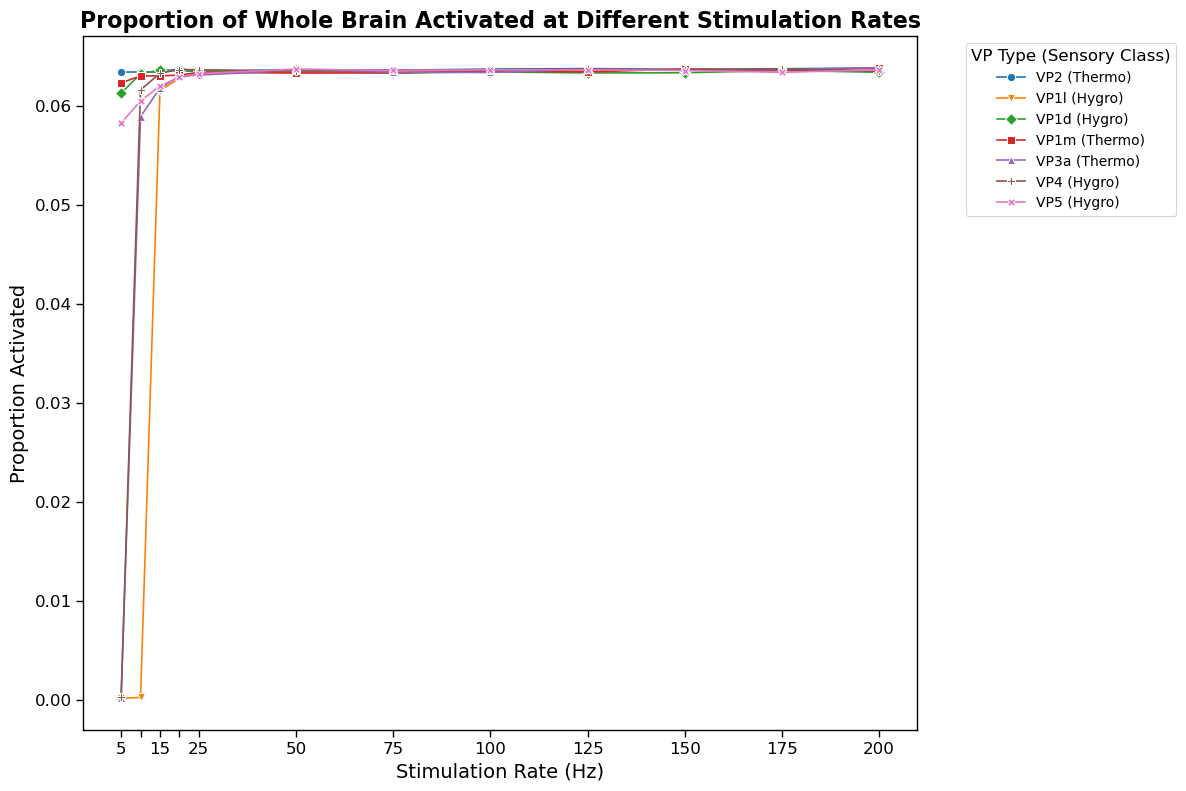

In [97]:
# Initialize a dictionary to store activations for each VP
vp_activations = {vp: [] for vp in neurons_2N.keys()}

# Loop over the input intensity and calculate activations
for vp in vp_activations:
    for i in rates:
        vp_activations[vp].append(pd.read_csv('./results/cellTypes/CSVs/'+str(vp.lower())+'_'+str(i)+'Hz_rates.csv')['flyid'].values.shape[0]/np.unique(neurons.root_id.values).shape[0])

# Convert vp_activations dictionary to a DataFrame
vp_activations_df = pd.DataFrame(vp_activations, index=rates)
print(vp_activations_df)

plt.figure(figsize=(12, 8))
for vp in vp_activations_df.columns:
    sns.lineplot(data=vp_activations_df[vp], color=vp_colors[vp], marker=vp_markers[vp], markersize=6, label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Whole Brain Activated at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks but exclude 10 and 20 labels
tick_labels = [str(rate) if rate not in [10, 20] else '' for rate in rates]
plt.xticks(rates, labels=tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig16_Whole_brain_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
hygro_df = classification[(classification['class'] == 'hygrosensory') & (classification['side'] == 'left')]
thermo_df = classification[(classification['class'] == 'thermosensory') & (classification['side'] == 'left')]

# Create a dictionary to store all dataframes
modality_dfs = {
    'thermo': thermo_df,
    'hygro': hygro_df
}
# Create dictionary to store filtered connection dataframes for each modality type
TH_connections_2N = {}
TH_neurons_2N = {}
TH_neurons_3N = {}
TH_connections_3N = {}

# For hygrosensory and thermosensory neurons
for modality, df in modality_dfs.items():
    downstream = connections[(connections['pre_root_id'].isin(df['root_id'])) & (connections['syn_count'] >= 5)]
    # Create a copy of the filtered classification data
    downstream_classification = classification[classification['root_id'].isin(downstream['post_root_id'])].copy()
    
    TH_connections_2N[modality] = downstream
    TH_neurons_2N[modality] = downstream_classification

# For each 2N, filter connections where pre_root_id matches 2N root_id with synapse filter of 10
for modality, df in TH_neurons_2N.items():
    downstream = connections[(connections['pre_root_id'].isin(df['root_id'])) & (connections['syn_count'] >= 10)]
    # Create a copy of the filtered classification data
    downstream_classification = classification[classification['root_id'].isin(downstream['post_root_id'])].copy()
    
    TH_connections_3N[modality] = downstream
    TH_neurons_3N[modality] = downstream_classification

for modality, modality_df in modality_dfs.items():
    for i in rates:
        ids_activated = pd.read_csv(f'./results/thermoHygro/CSVs/results{modality.lower()}_{i}Hz_std.csv')['flyid'].values
        TH_neurons_2N[modality][f'activation_{i}Hz'] = TH_neurons_2N[modality]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        TH_neurons_3N[modality][f'activation_{i}Hz'] = TH_neurons_3N[modality]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        TH_connections_2N[modality][f'activation_{i}Hz'] = TH_connections_2N[modality]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        TH_connections_3N[modality][f'activation_{i}Hz'] = TH_connections_3N[modality]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')

/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_5311/3723999485.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TH_connections_2N[modality][f'activation_{i}Hz'] = TH_connections_2N[modality]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_5311/3723999485.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TH_connections_3N[modality][f'activation_{i}Hz'] = TH_connections_3N[modality]['post_root

['activation_5Hz', 'activation_10Hz', 'activation_15Hz', 'activation_20Hz', 'activation_25Hz', 'activation_50Hz', 'activation_75Hz', 'activation_100Hz', 'activation_125Hz', 'activation_150Hz', 'activation_175Hz', 'activation_200Hz']
['activation_5Hz', 'activation_10Hz', 'activation_15Hz', 'activation_20Hz', 'activation_25Hz', 'activation_50Hz', 'activation_75Hz', 'activation_100Hz', 'activation_125Hz', 'activation_150Hz', 'activation_175Hz', 'activation_200Hz']


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

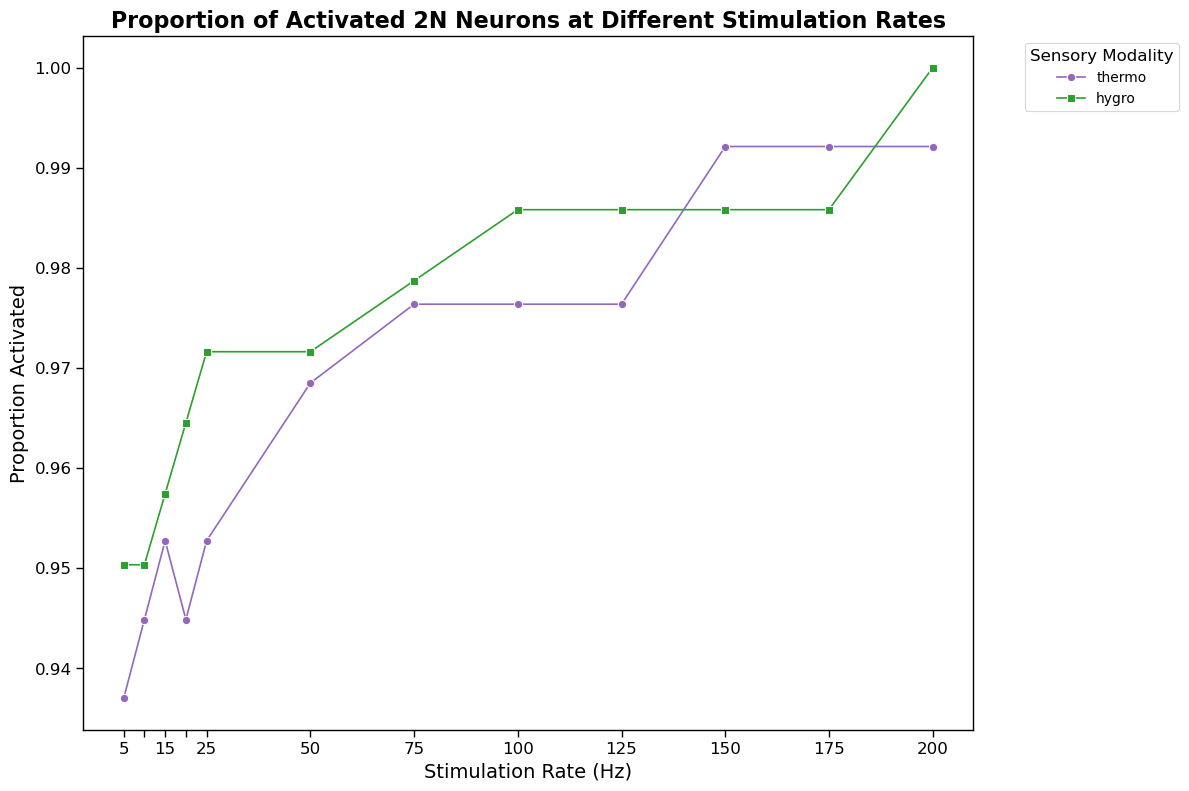

In [ ]:
# Initialize a dictionary to store proportions for each VP
proportions = {}

# Process each VP DataFrame
for modality in TH_neurons_2N:
    activation_columns = get_activation_columns(TH_neurons_2N[modality])
    print(activation_columns)
    proportions[modality] = {freq: calculate_proportions(TH_neurons_2N[modality], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_df = pd.DataFrame(proportions)

sns.set_context('paper')

# Define custom color palette for each modality
custom_palette = sns.color_palette("Set2", 2)  # Just need 2 colors for thermo/hygro
modality_colors = {
    'hygro': '#2ca02c',
    'thermo': '#9467bd',
}

# Define markers for each modality
modality_markers = {
    'thermo': 'o',
    'hygro': 's'
}

plt.figure(figsize=(12, 8))

# Create x-axis values proportional to rates
x_values = np.array(rates)

for modality in proportions_df.columns:
    # Plot using the proportional x-axis values
    sns.lineplot(x=x_values, y=proportions_df[modality], color=modality_colors[modality], 
                marker=modality_markers[modality], markersize=6, label=f"{modality}")

# Add plot titles and labels
plt.title('Proportion of Activated 2N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks at the actual rate values, excluding 10 and 20 labels
tick_labels = [str(rate) if rate not in [10, 20] else '' for rate in rates]
plt.xticks(x_values, labels=tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='Sensory Modality', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig17_thermo_hygro_2N_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

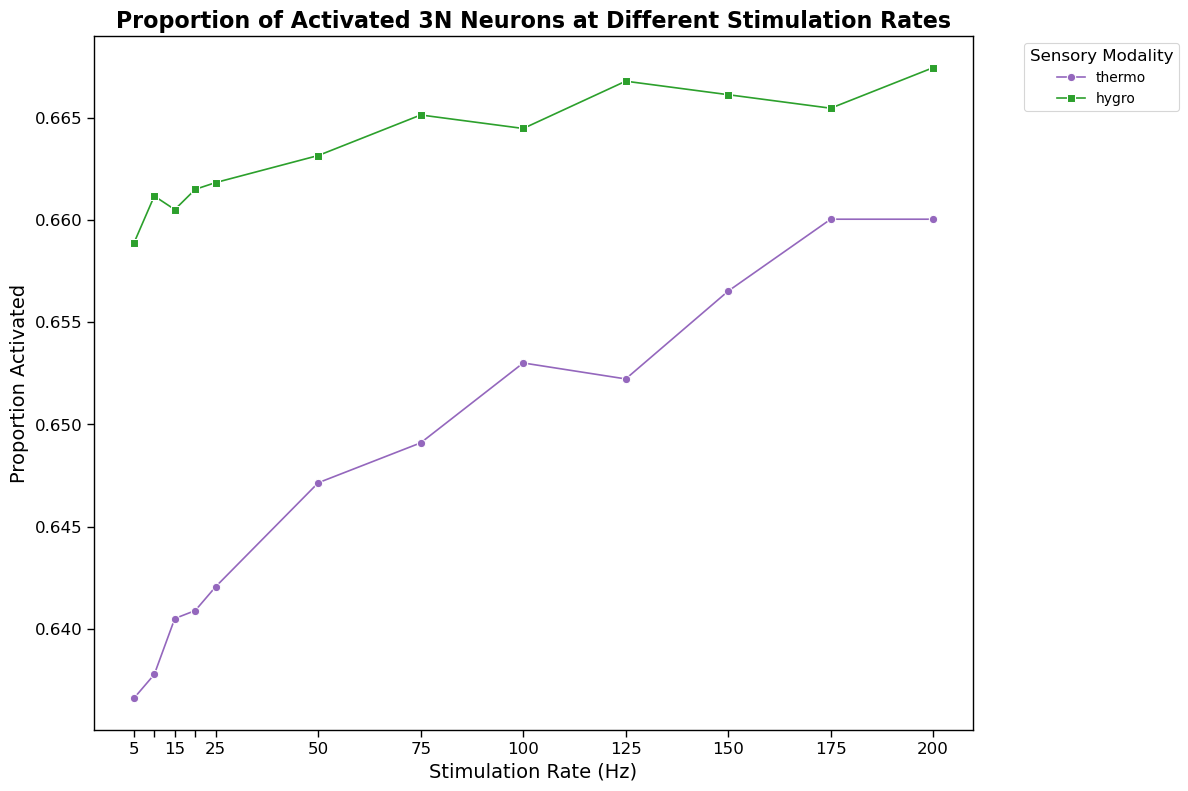

In [110]:
# Calculate proportions for 3N neurons
proportions_3N = {}
for modality in TH_neurons_3N:
    activation_columns = get_activation_columns(TH_neurons_3N[modality])
    proportions_3N[modality] = {freq: calculate_proportions(TH_neurons_3N[modality], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_3N_df = pd.DataFrame(proportions_3N)

plt.figure(figsize=(12, 8))
for modality in proportions_3N_df.columns:
    # Plot using the proportional x-axis values
    sns.lineplot(x=x_values, y=proportions_3N_df[modality], color=modality_colors[modality], 
                marker=modality_markers[modality], markersize=6, label=f"{modality}")

# Add plot titles and labels
plt.title('Proportion of Activated 3N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks at the actual rate values, excluding 10 and 20 labels
tick_labels = [str(rate) if rate not in [10, 20] else '' for rate in rates]
plt.xticks(x_values, labels=tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Customize ticks on the y-axis for better readability
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='Sensory Modality', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig18_thermo_hygro_3N_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

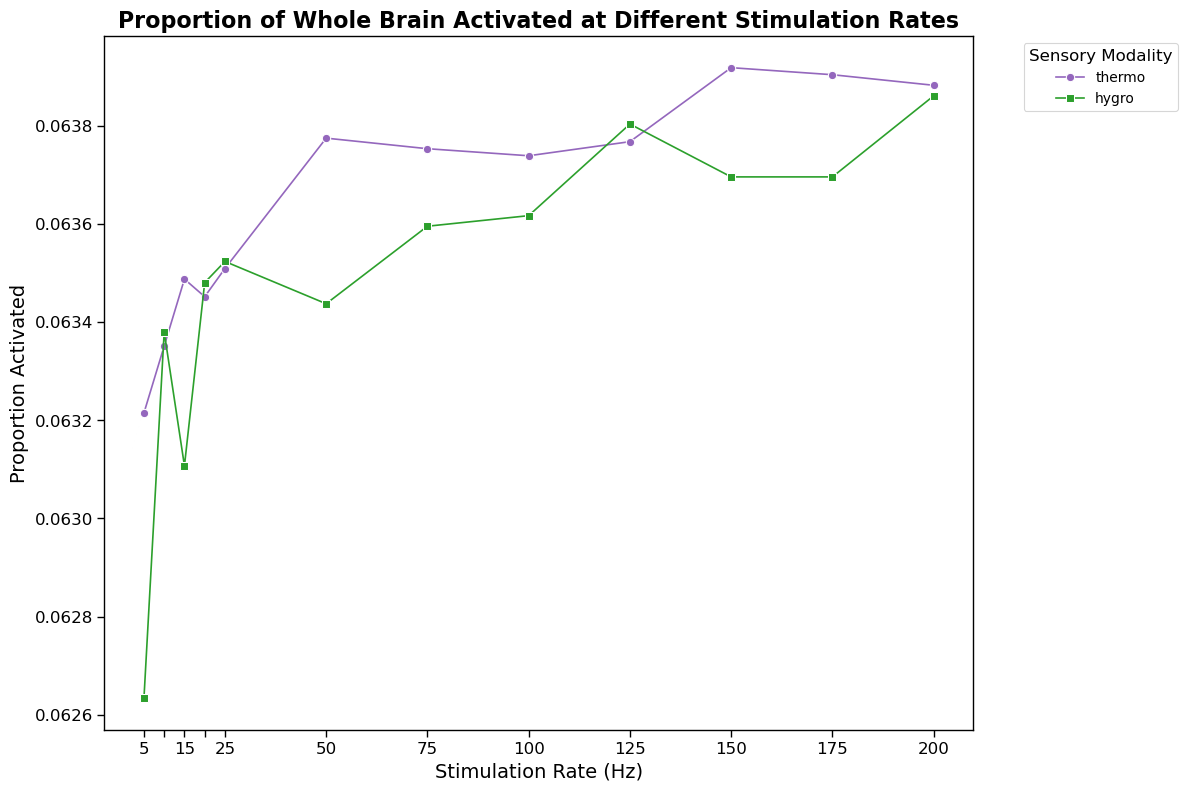

In [ ]:
# Initialize a dictionary to store activations for each VP
modality_activations = {modality: [] for modality in TH_neurons_2N.keys()}

# Loop over the input intensity and calculate activations
for modality in modality_activations:
    for i in rates:
        modality_activations[modality].append(pd.read_csv('./results/thermoHygro/CSVs/results'+str(modality.lower())+'_'+str(i)+'Hz_std.csv')['flyid'].values.shape[0]/np.unique(neurons.root_id.values).shape[0])

# Convert vp_activations dictionary to a DataFrame
modality_activations_df = pd.DataFrame(modality_activations, index=rates)

plt.figure(figsize=(12, 8))
for modality in modality_activations_df.columns:
    # Plot using the proportional x-axis values
    sns.lineplot(x=x_values, y=modality_activations_df[modality], color=modality_colors[modality], 
                marker=modality_markers[modality], markersize=6, label=f"{modality}")

# Add plot titles and labels
plt.title('Proportion of Whole Brain Activated at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks at the actual rate values, excluding 10 and 20 labels
tick_labels = [str(rate) if rate not in [10, 20] else '' for rate in rates]
plt.xticks(x_values, labels=tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='Sensory Modality', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/Fig19_thermo_hygro_whole_brain_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()
